In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_21968\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The Stony Brook University COVID-19 Positive Cases (Stony Brook) Dataset

This collection of cases was acquired at Stony Brook University from patients who tested positive for COVID-19. The collection includes images from different modalities and organ sites (chest radiographs, chest CTs, brain MRIs, etc.). Radiology imaging data is extremely important in COVID-19 from both a diagnostic and a monitoring perspective, given the crucial nature of COVID-19 pulmonary disease and its rapid phenotypic changes. The datasets are available for building AI systems for diagnostic and prognostic modeling. 

This collection also includes associated clinical data for each patient. The clinical data consists of diagnoses, procedures, lab tests, covid19 specific data values (e.g., intubation status, symptoms at admission) and a set of derived data elements, which were used in analyses of this data. The clinical data is stored as a set of csv files which comply with OMOP Common Data Model data elements. 

The images on the right show automated identification of regions of prognostic importance on baseline chest radiographs. The regions of highest prognostic importance (as determined by the AI algorithm) are observed primarily in lower lung regions, consistent with clinical findings on the corresponding CXRs.

## [Source](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=89096912)

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "C:\\Datasets\\COVID19\\Tomografia\\COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "Stony Brook"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT

## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

patient_id source     class country  sex   age partition slice_selection  \
0     NCP_96   CNCB  COVID-19   China    M  74.0     train          Expert   
1    NCP_270   CNCB  COVID-19   China  N/A   N/A     train          Expert   
2    NCP_322   CNCB  COVID-19   China  N/A   N/A     train          Expert   
3   NCP_1276   CNCB  COVID-19   China  N/A   N/A     train          Expert   
4   NCP_2683   CNCB  COVID-19   China  N/A   N/A     train          Expert   

  verified_finding   view modality  sample_count  
0              Yes  Axial       CT           121  
1              Yes  Axial       CT           124  
2              Yes  Axial       CT            40  
3              Yes  Axial       CT            32  
4              Yes  Axial       CT             9

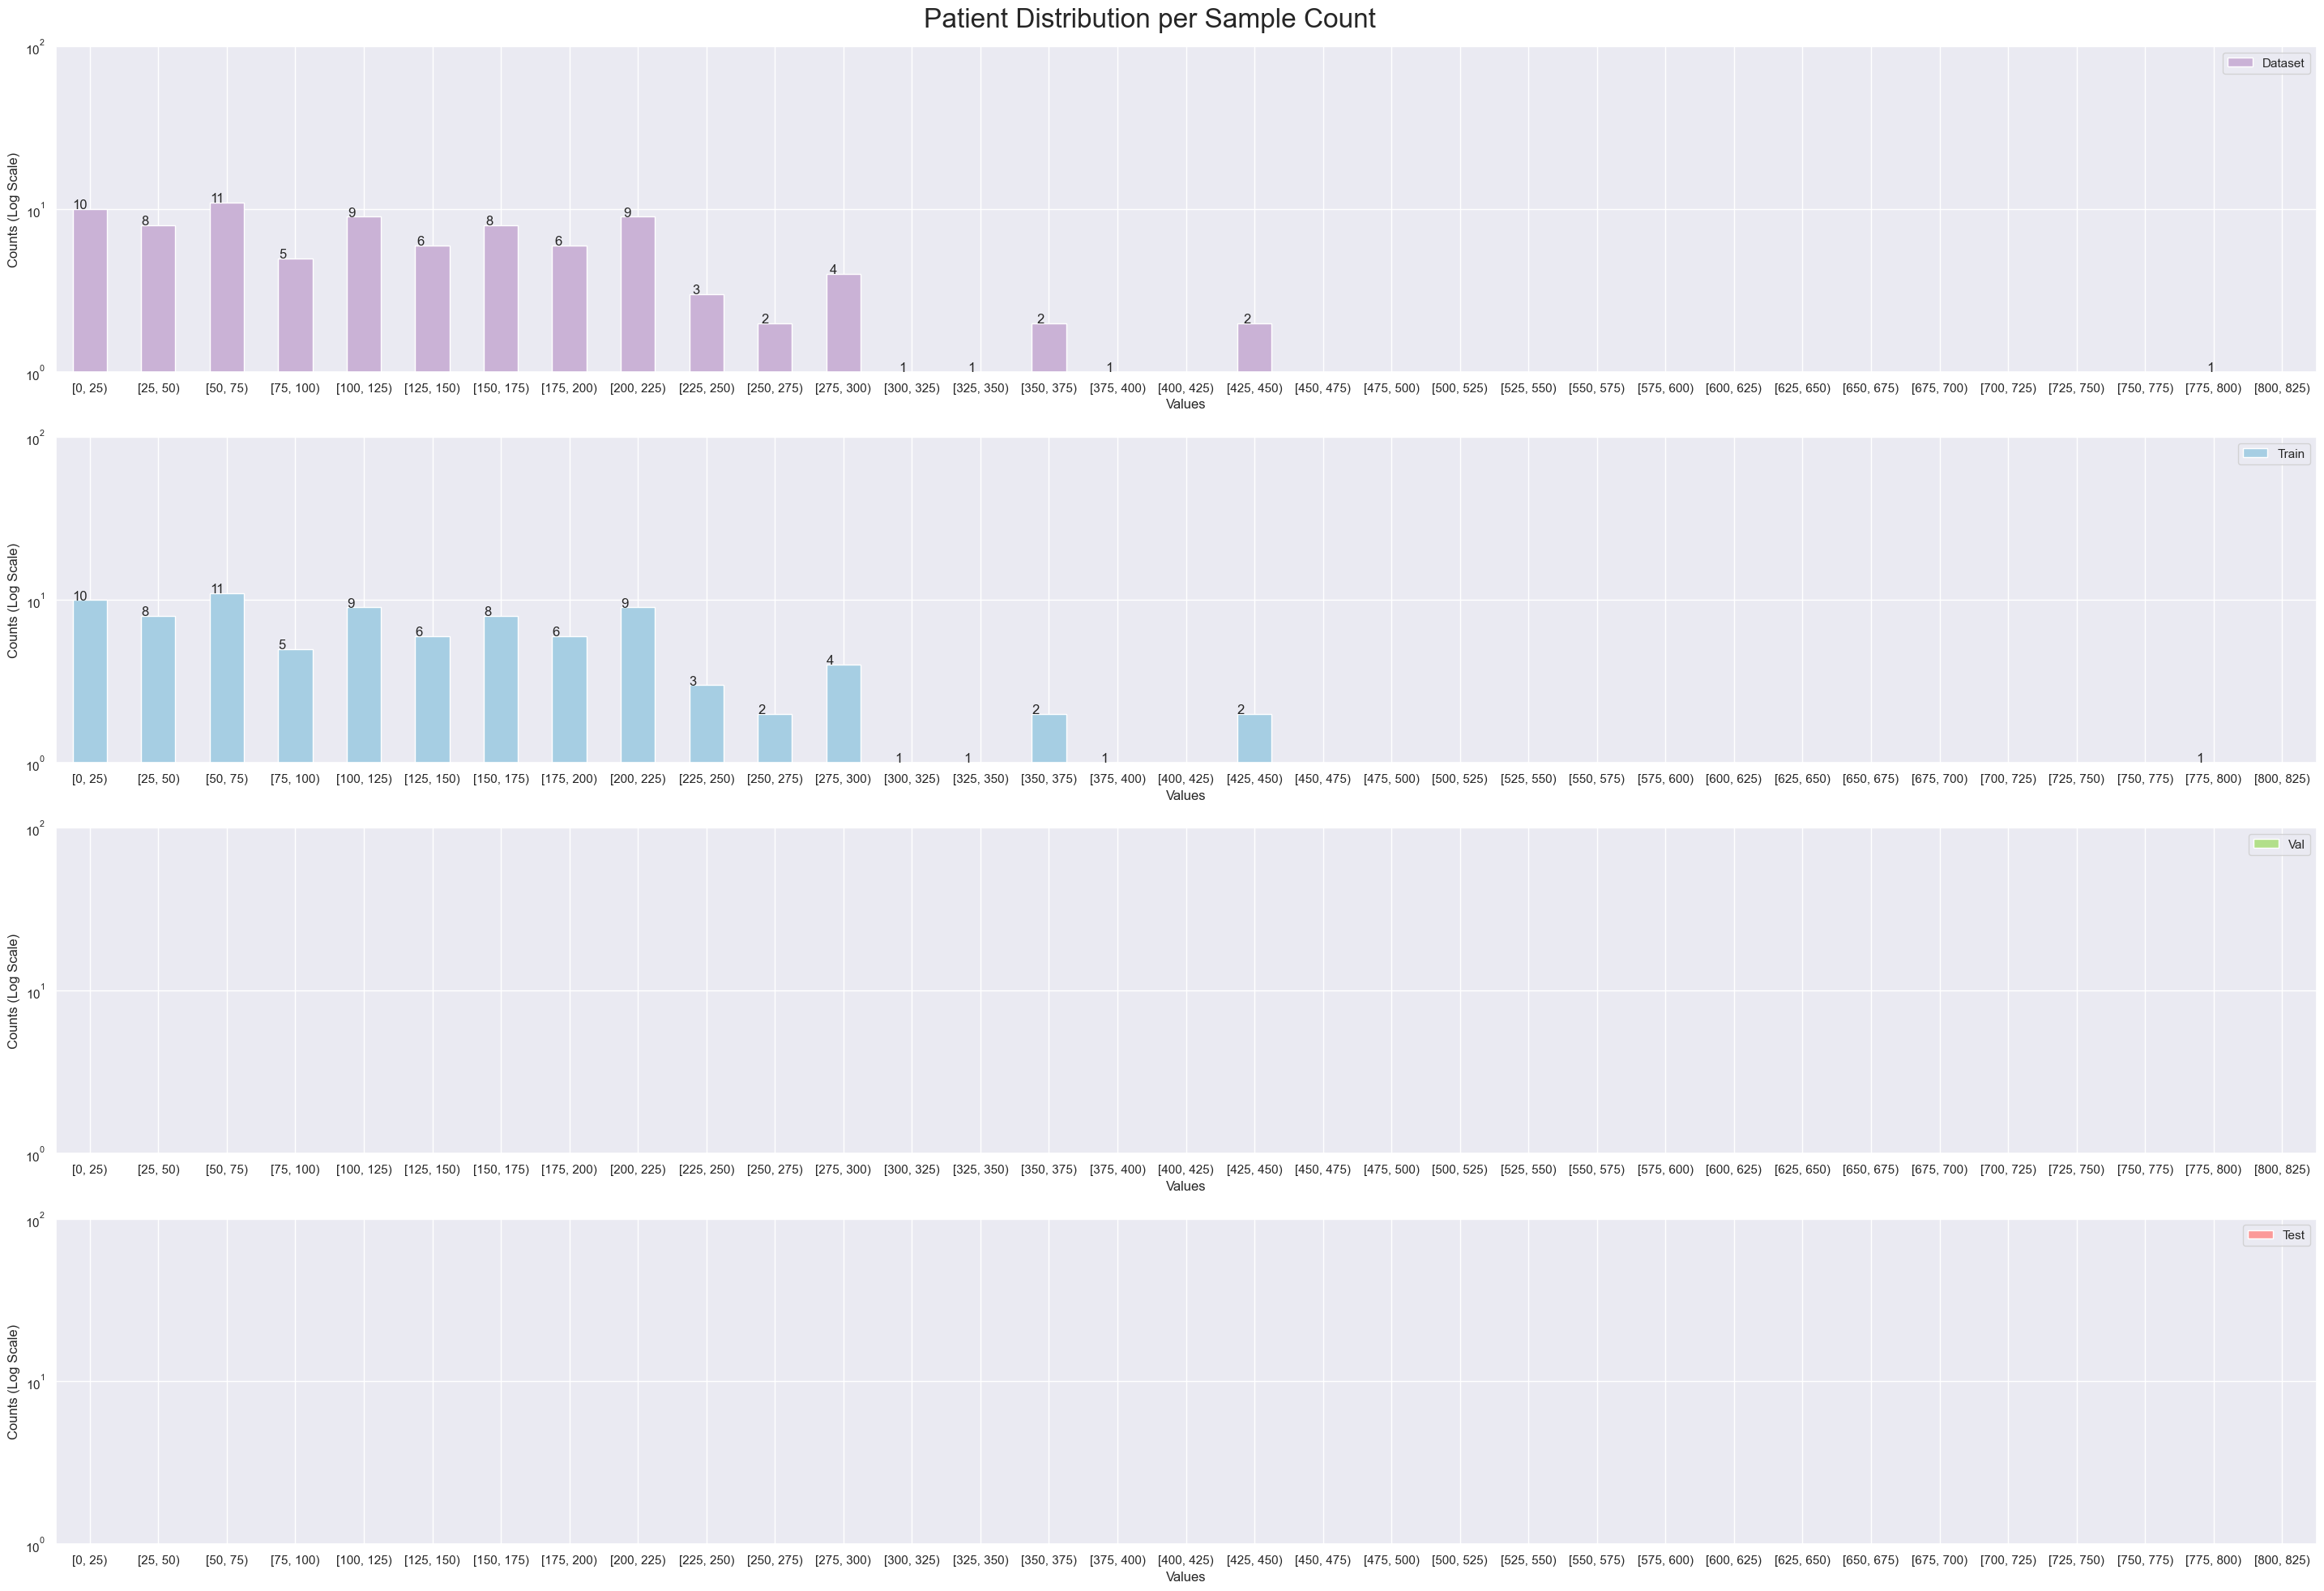

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

Dataset  Train  Val  Test
Values                               
[0, 25)          10     10    0     0
[25, 50)          8      8    0     0
[50, 75)         11     11    0     0
[75, 100)         5      5    0     0
[100, 125)        9      9    0     0
[125, 150)        6      6    0     0
[150, 175)        8      8    0     0
[175, 200)        6      6    0     0
[200, 225)        9      9    0     0
[225, 250)        3      3    0     0
[250, 275)        2      2    0     0
[275, 300)        4      4    0     0
[300, 325)        1      1    0     0
[325, 350)        1      1    0     0
[350, 375)        2      2    0     0
[375, 400)        1      1    0     0
[400, 425)        0      0    0     0
[425, 450)        2      2    0     0
[450, 475)        0      0    0     0
[475, 500)        0      0    0     0
[500, 525)        0      0    0     0
[525, 550)        0      0    0     0
[550, 575)        0      0    0     0
[575, 600)        0      0    0     0
[600, 625)        0      0    0     0
[625, 650)        0      0    0     0
[650, 675)        0      0    0     0
[675, 700)        0      0    0     0
[700, 725)        0      0    0     0
[725, 750)        0      0    0     0
[750, 775)        0      0    0     0
[775, 800)        1      1    0     0
[800, 825)        0      0    0     0
SUM              89     89    0     0

# Plots

## Class

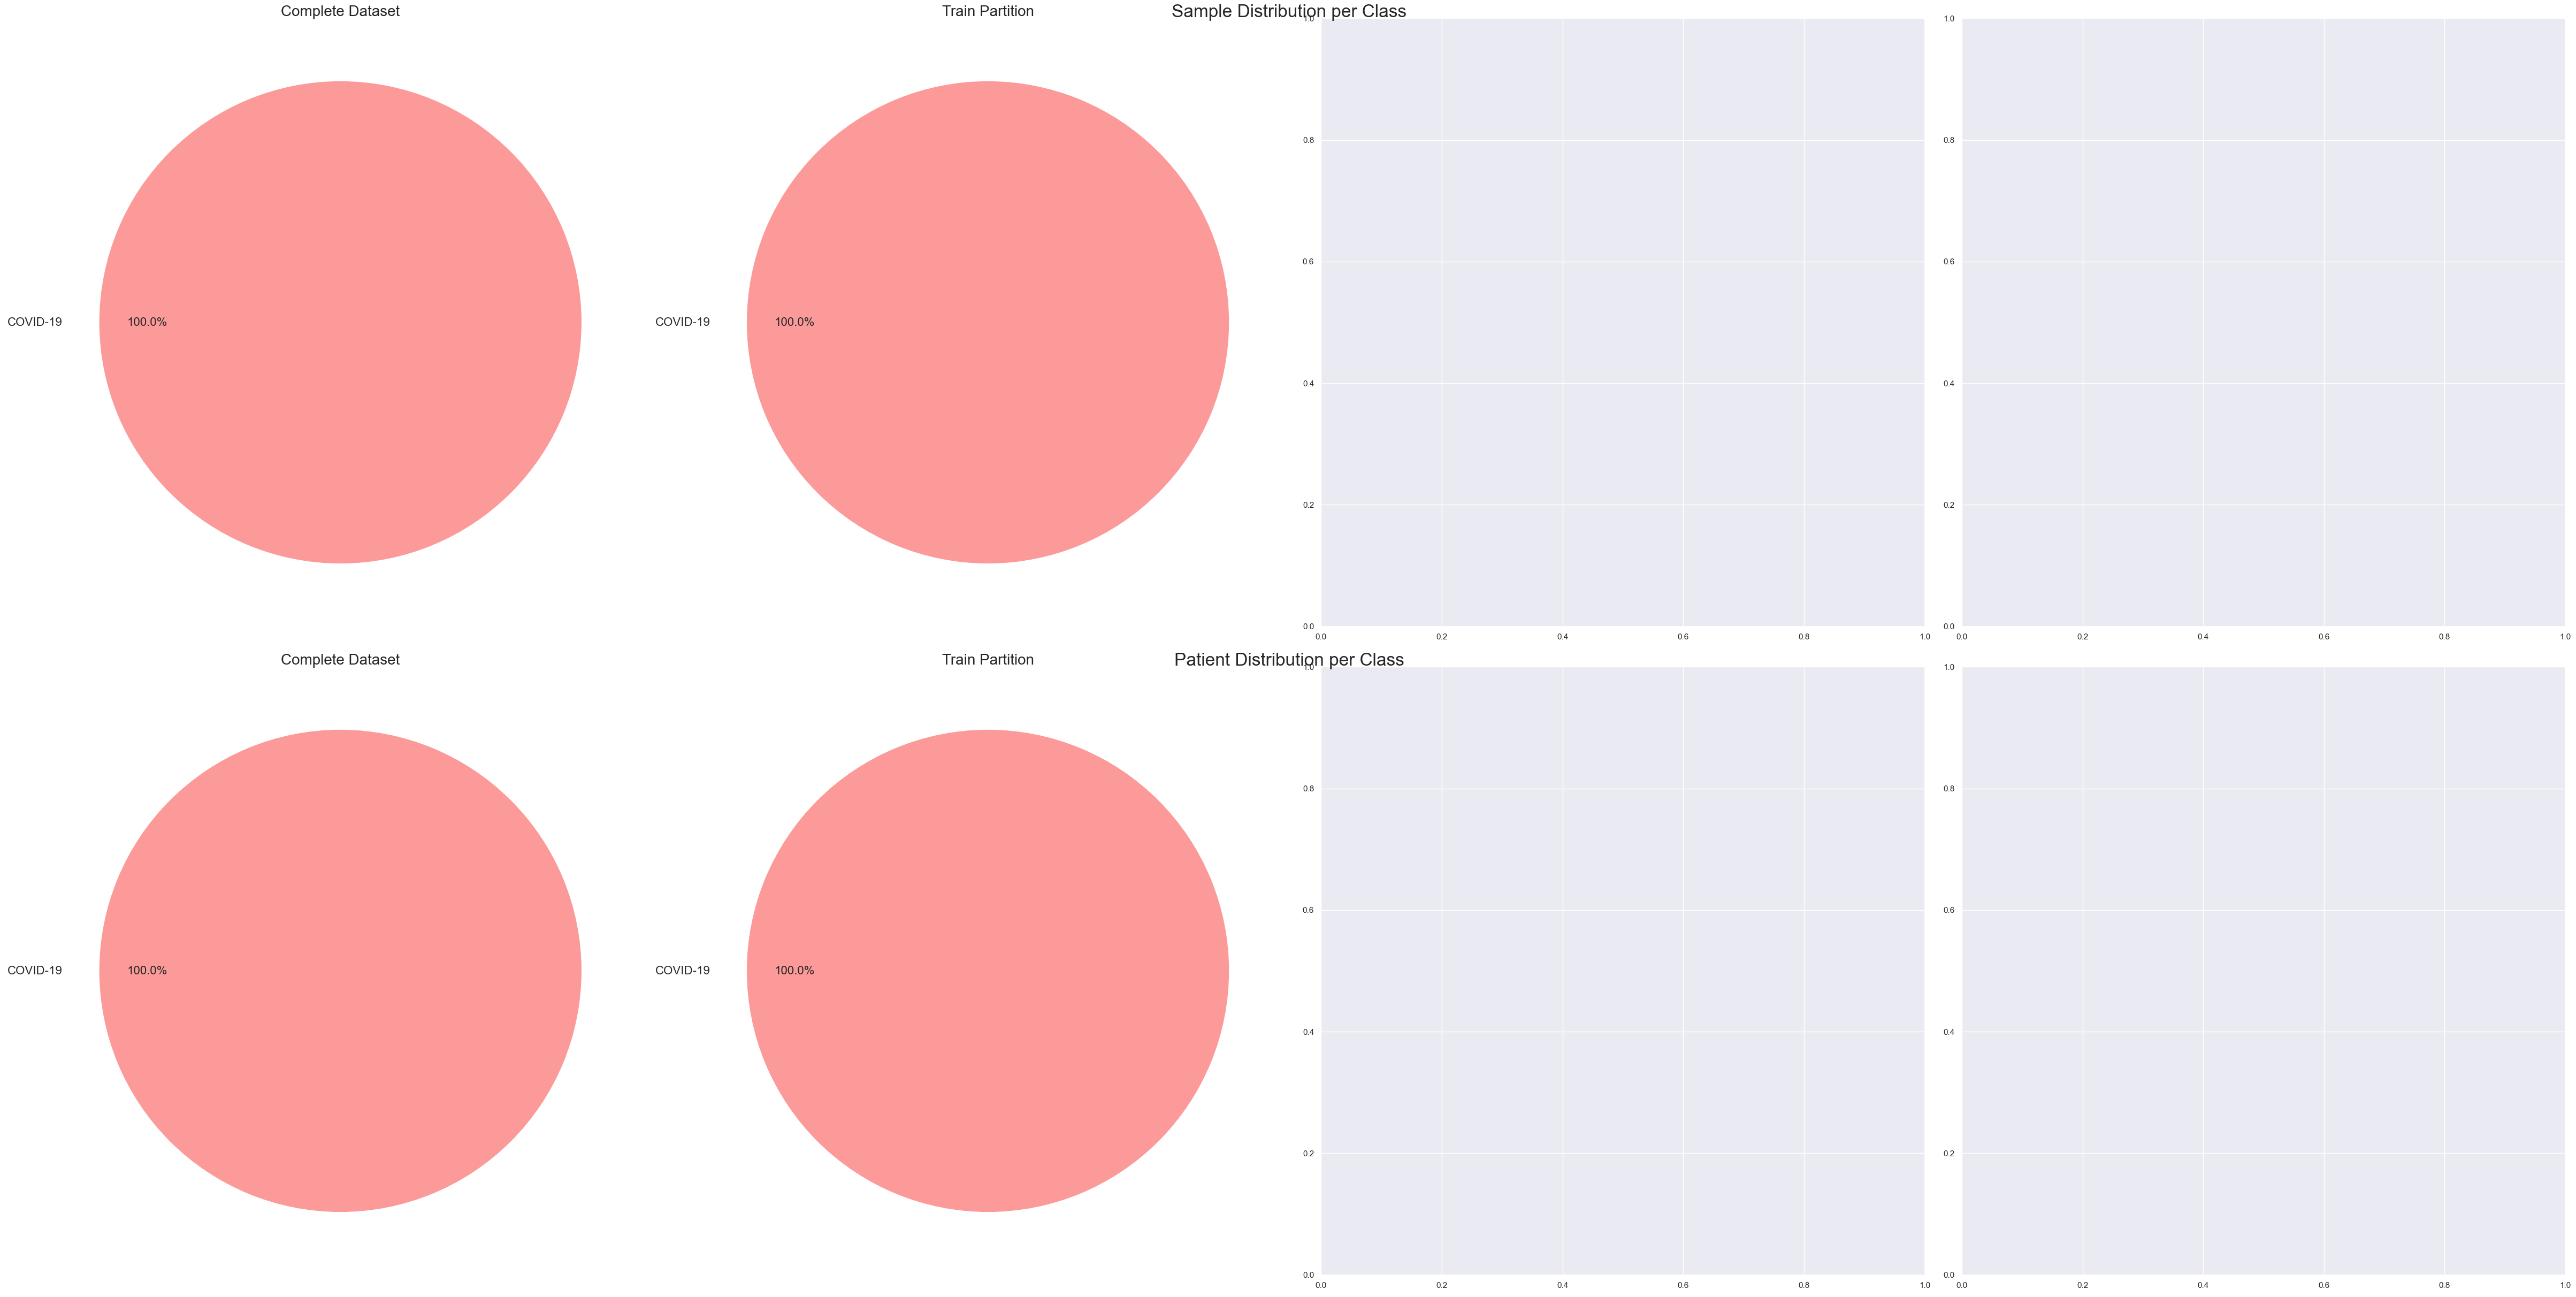

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 14461 
 14461 
 0 
 0 
 
 
 Normal 
 0 
 0 
 0 
 0 
 
 
 Pneumonia 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 90 
 90 
 0 
 0 
 
 
 Pneumonia 
 0 
 0 
 0 
 0 
 
 
 Normal 
 0 
 0 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

## Age

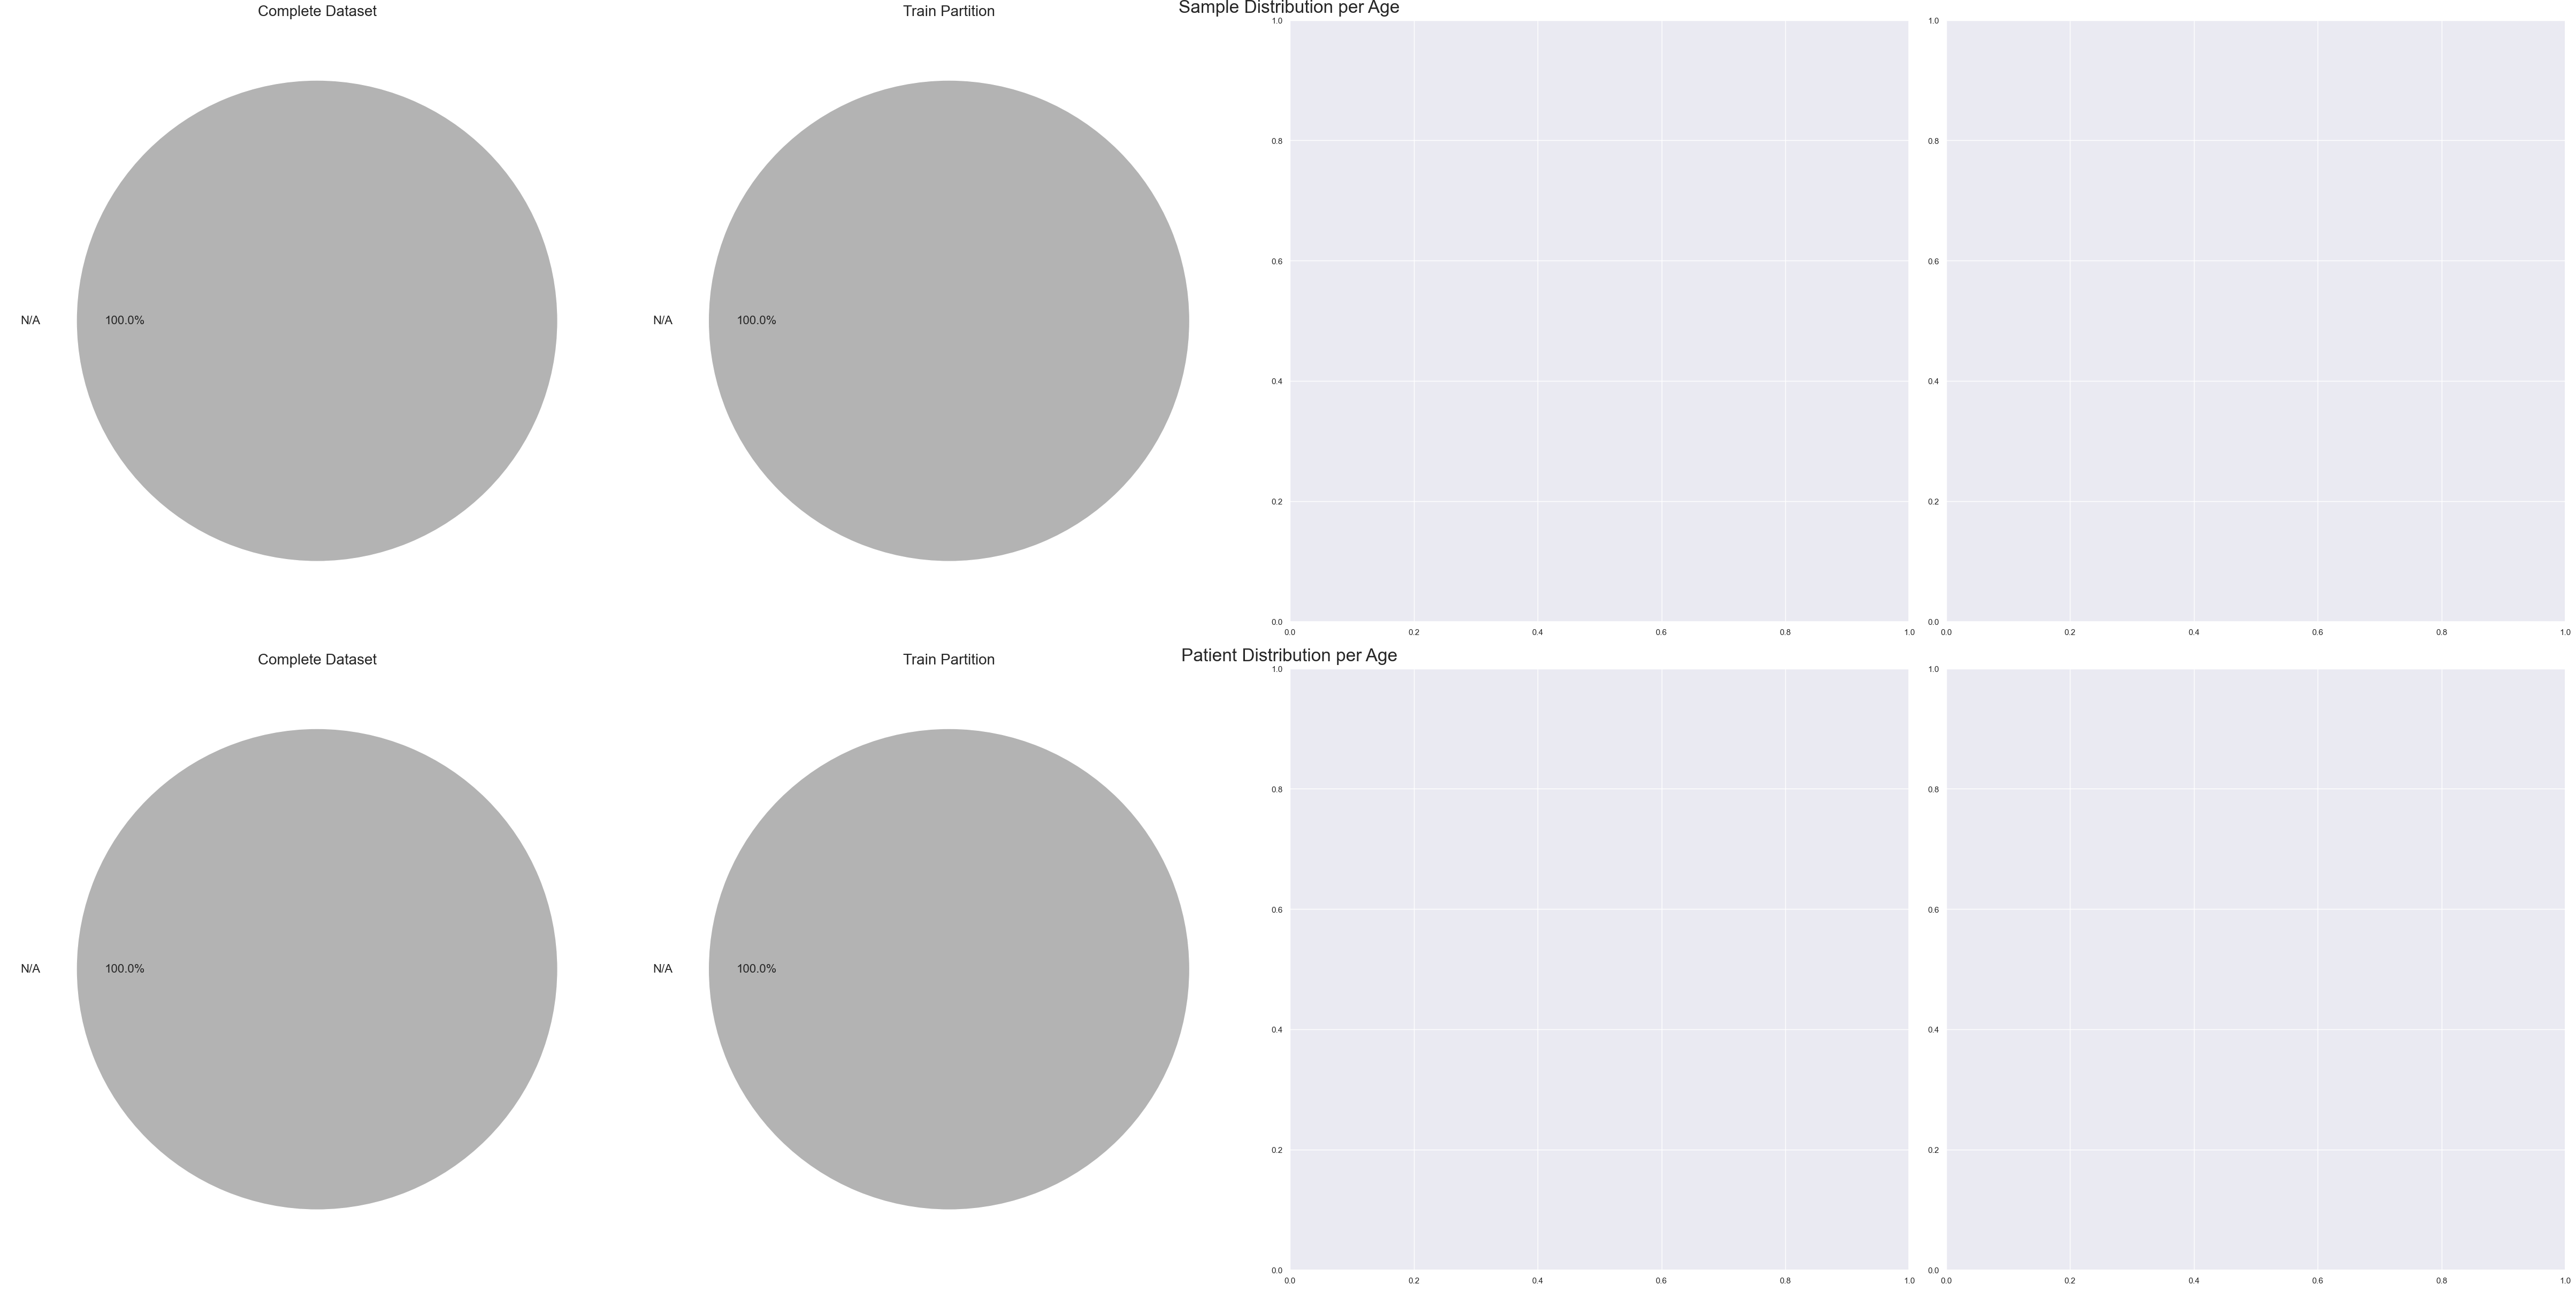

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 14461 
 14461 
 0 
 0 
 
 
 Known Ages 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 90 
 90 
 0 
 0 
 
 
 Known Ages 
 0 
 0 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

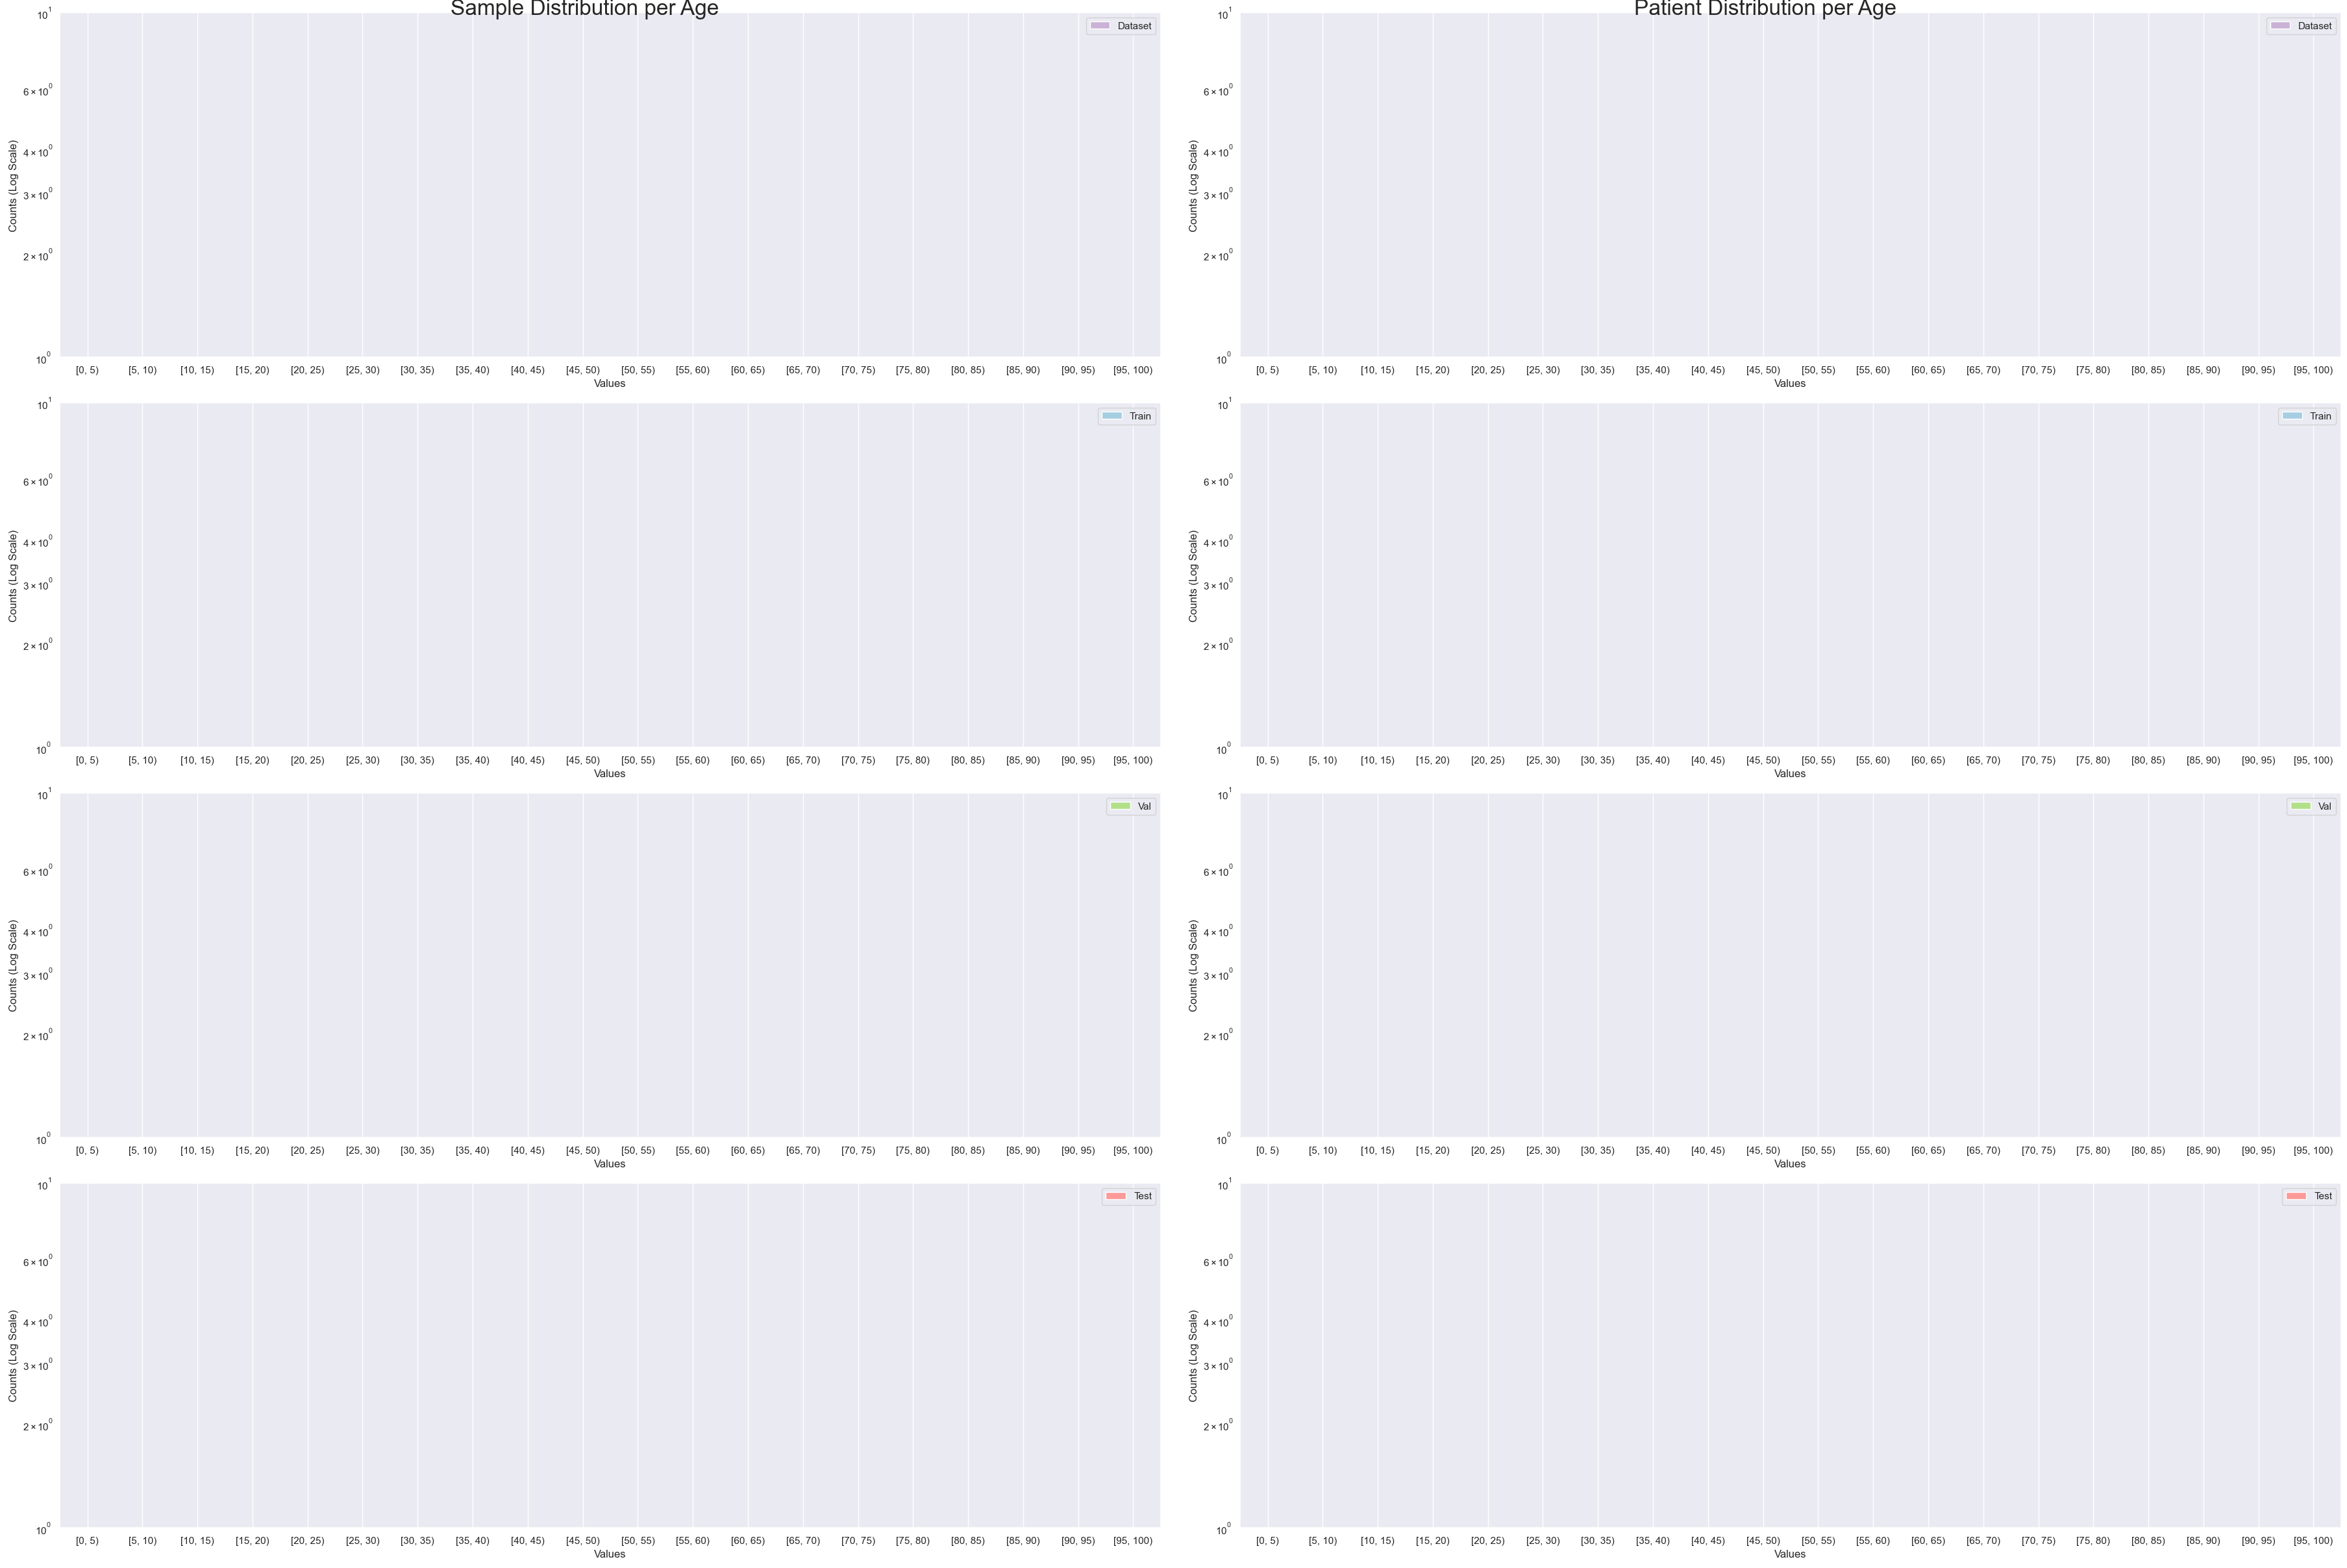

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 0 
 0 
 0 
 0 
 
 
 [20, 25) 
 0 
 0 
 0 
 0 
 
 
 [25, 30) 
 0 
 0 
 0 
 0 
 
 
 [30, 35) 
 0 
 0 
 0 
 0 
 
 
 [35, 40) 
 0 
 0 
 0 
 0 
 
 
 [40, 45) 
 0 
 0 
 0 
 0 
 
 
 [45, 50) 
 0 
 0 
 0 
 0 
 
 
 [50, 55) 
 0 
 0 
 0 
 0 
 
 
 [55, 60) 
 0 
 0 
 0 
 0 
 
 
 [60, 65) 
 0 
 0 
 0 
 0 
 
 
 [65, 70) 
 0 
 0 
 0 
 0 
 
 
 [70, 75) 
 0 
 0 
 0 
 0 
 
 
 [75, 80) 
 0 
 0 
 0 
 0 
 
 
 [80, 85) 
 0 
 0 
 0 
 0 
 
 
 [85, 90) 
 0 
 0 
 0 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 0 
 0 
 0 
 0 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 0 
 0 
 0 
 0 
 
 
 [20, 25) 
 0 
 0 
 0 
 0 
 
 
 [25, 30) 
 0 
 0 
 0 
 0 
 
 
 [30, 35) 
 0 
 0 
 0 
 0 
 
 
 [35, 40) 
 0 
 0 
 0 
 0 
 
 
 [40, 45) 
 0 
 0 
 0 
 0 
 
 
 [45, 50) 
 0 
 0 
 0 
 0 
 
 
 [50, 55) 
 0 
 0 
 0 
 0 
 
 
 [55, 60) 
 0 
 0 
 0 
 0 
 
 
 [60, 65) 
 0 
 0 
 0 
 0 
 
 
 [65, 70) 
 0 
 0 
 0 
 0 
 
 
 [70, 75) 
 0 
 0 
 0 
 0 
 
 
 [75, 80) 
 0 
 0 
 0 
 0 
 
 
 [80, 85) 
 0 
 0 
 0 
 0 
 
 
 [85, 90) 
 0 
 0 
 0 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 0 
 0 
 0 
 0

## Sex

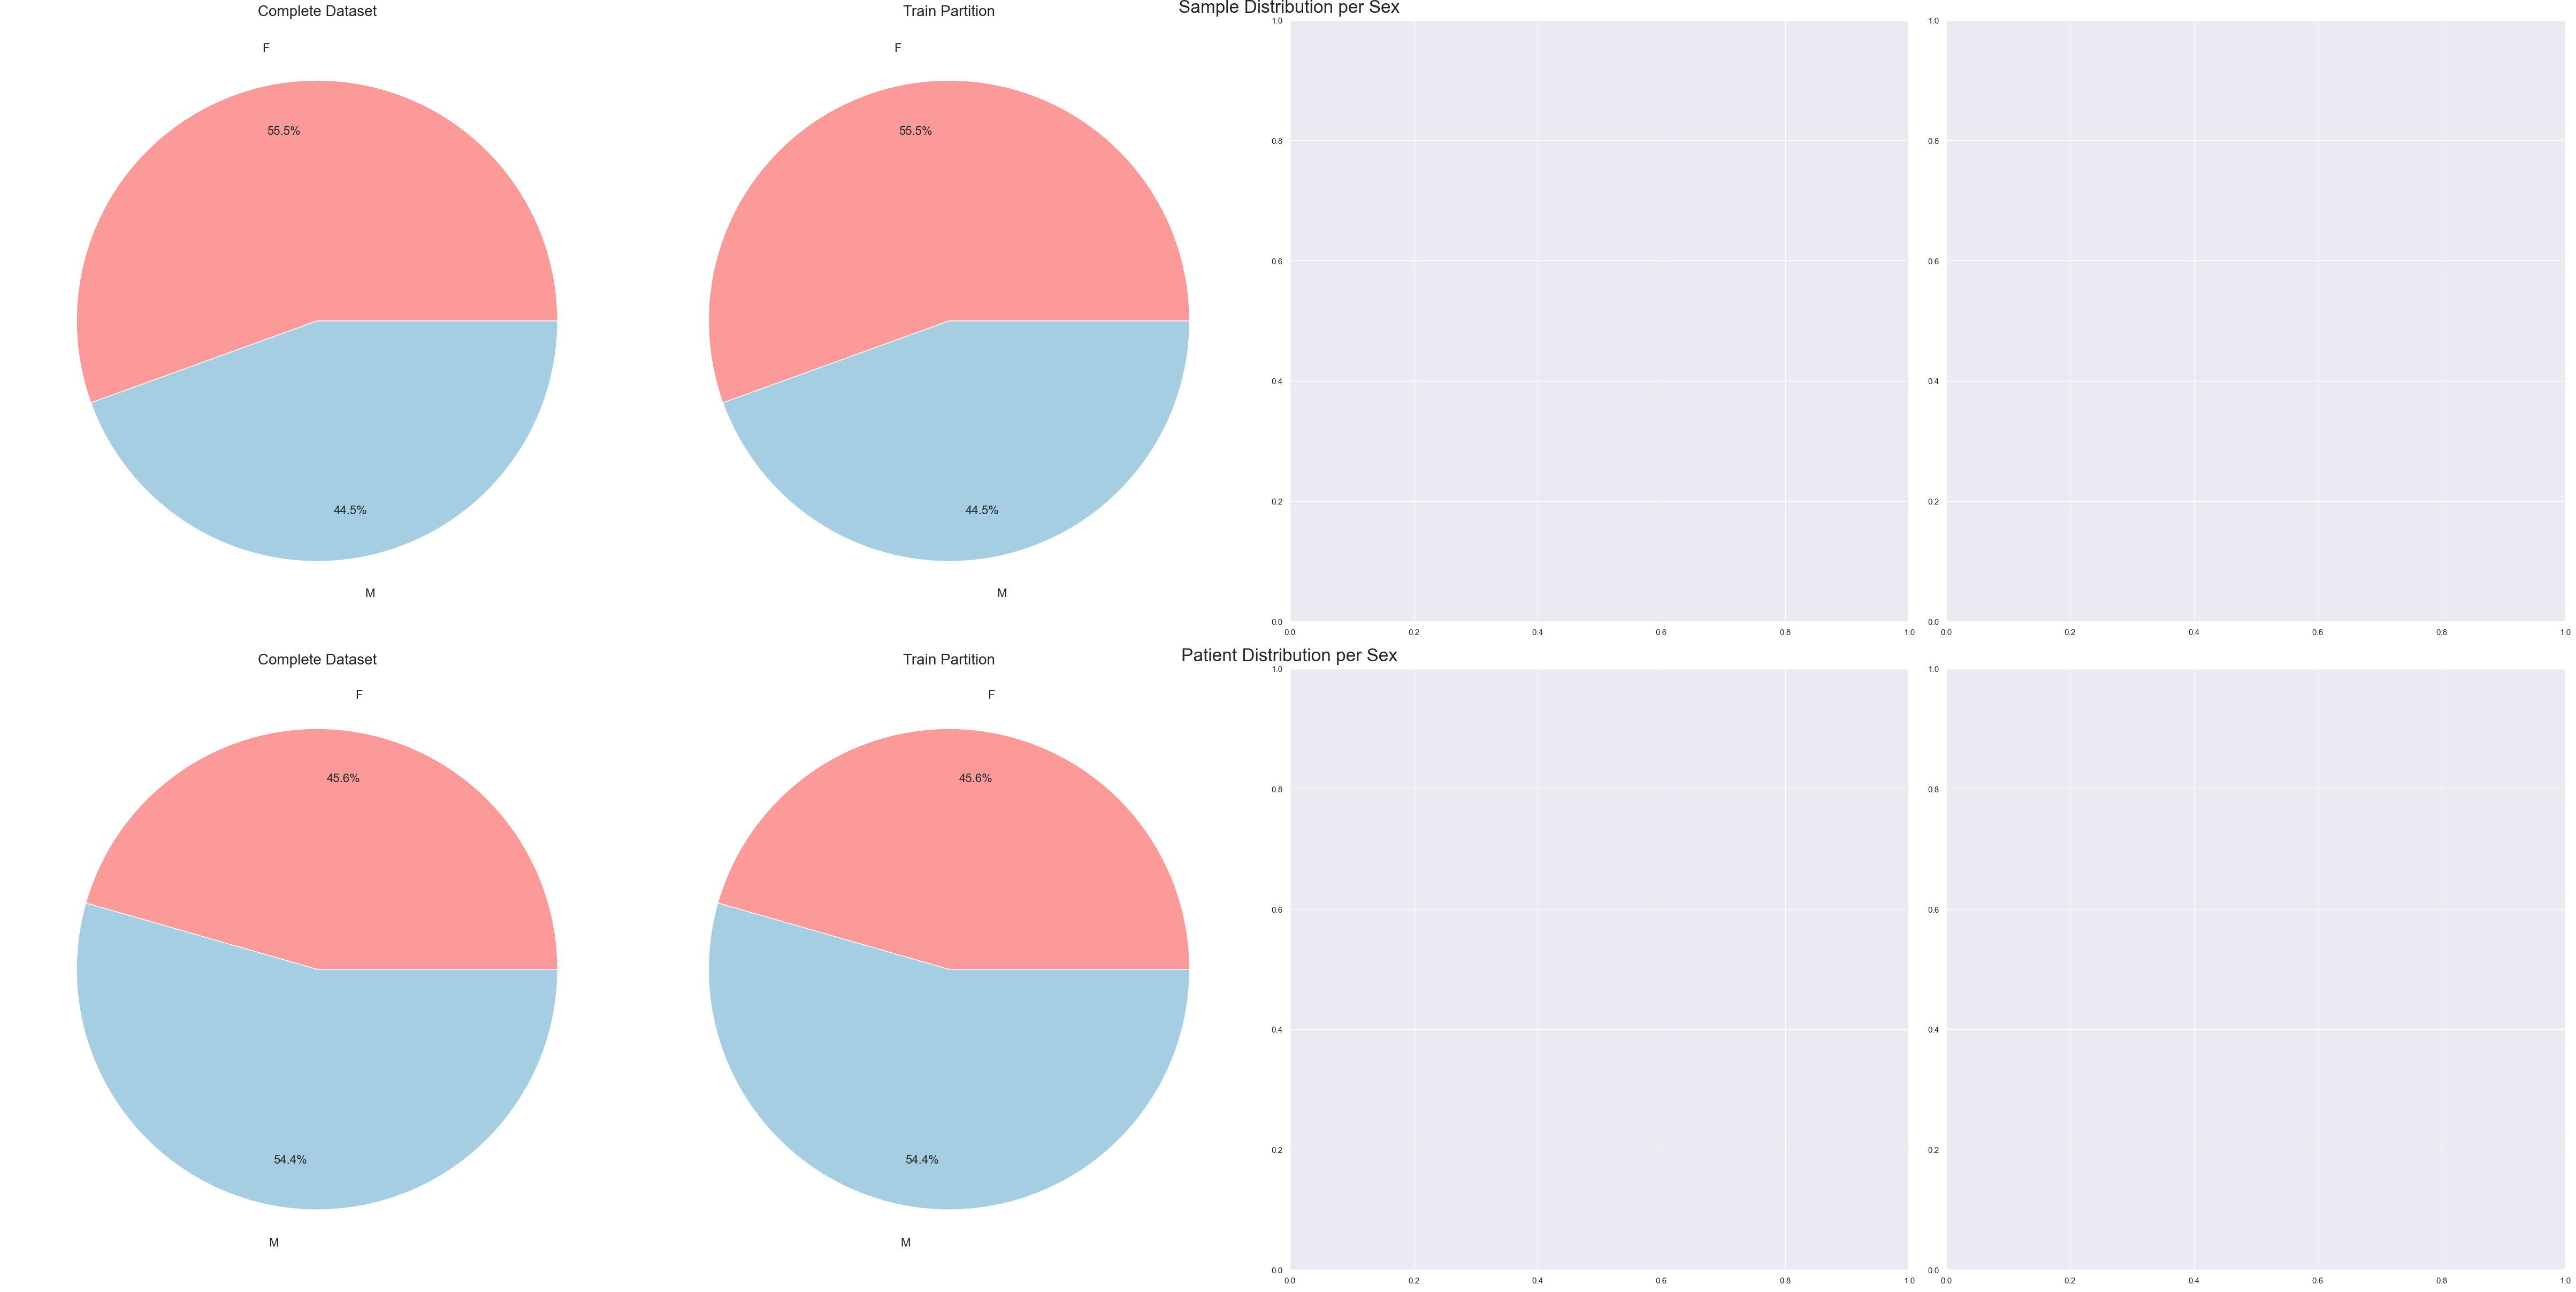

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 6431 
 6431 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 F 
 8030 
 8030 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 M 
 49 
 49 
 0 
 0 
 
 
 F 
 41 
 41 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

## Country

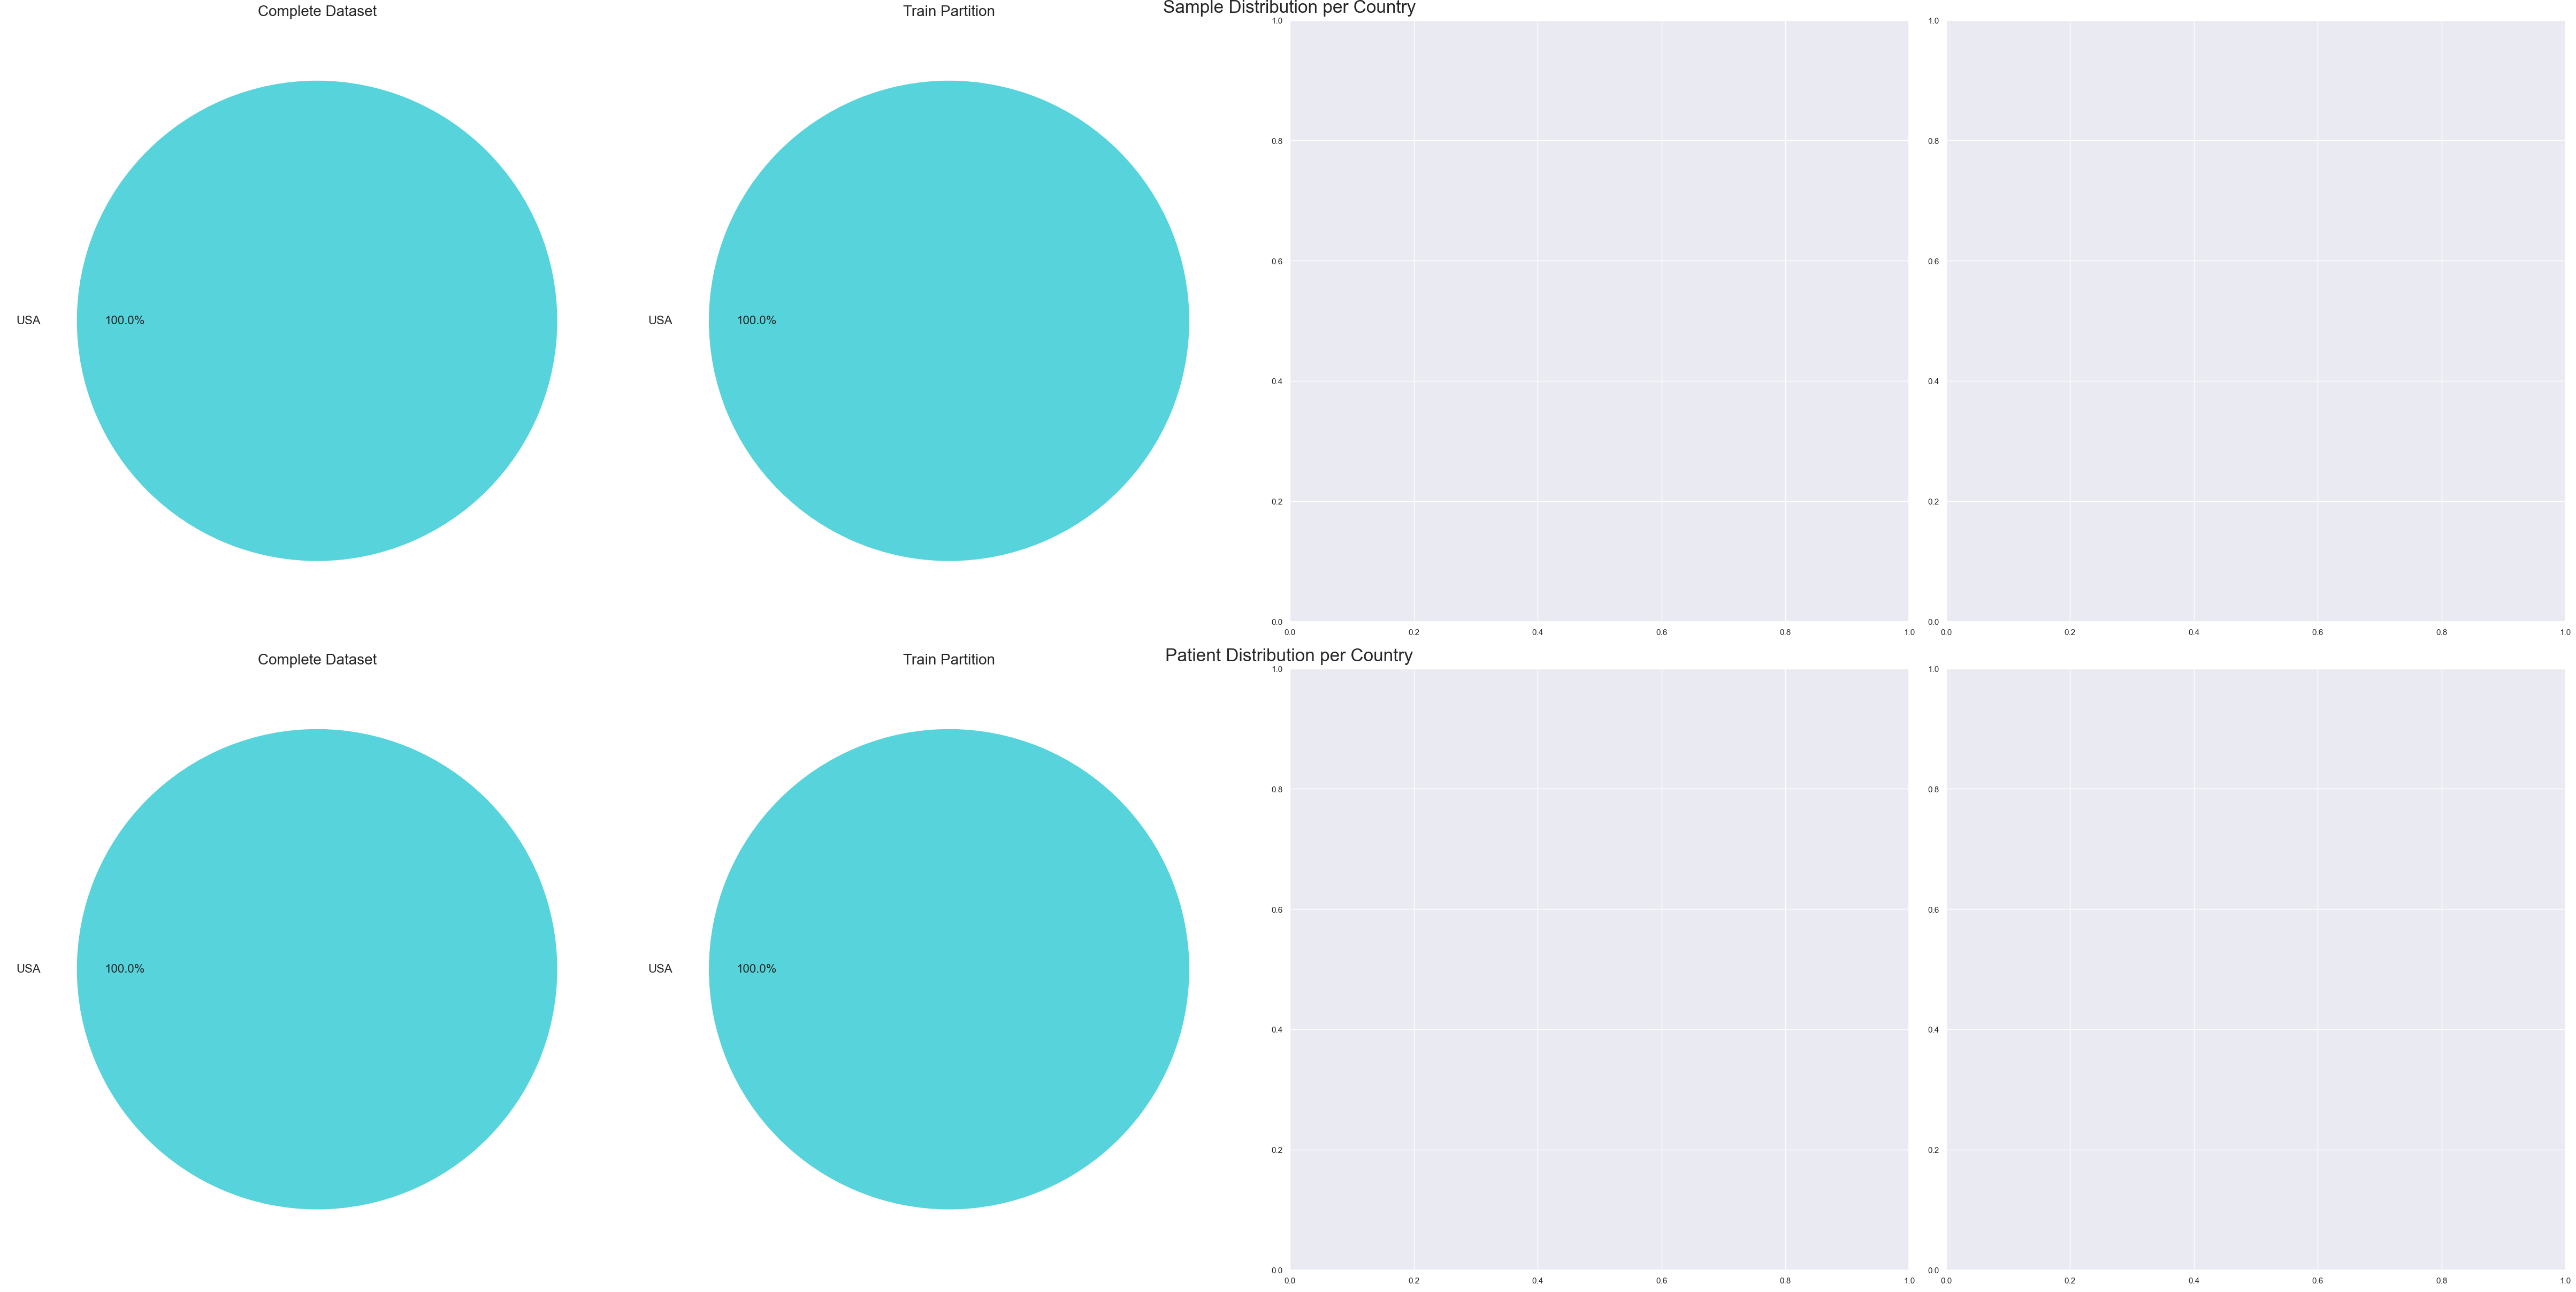

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 USA 
 14461 
 14461 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 USA 
 90 
 90 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

## Partition

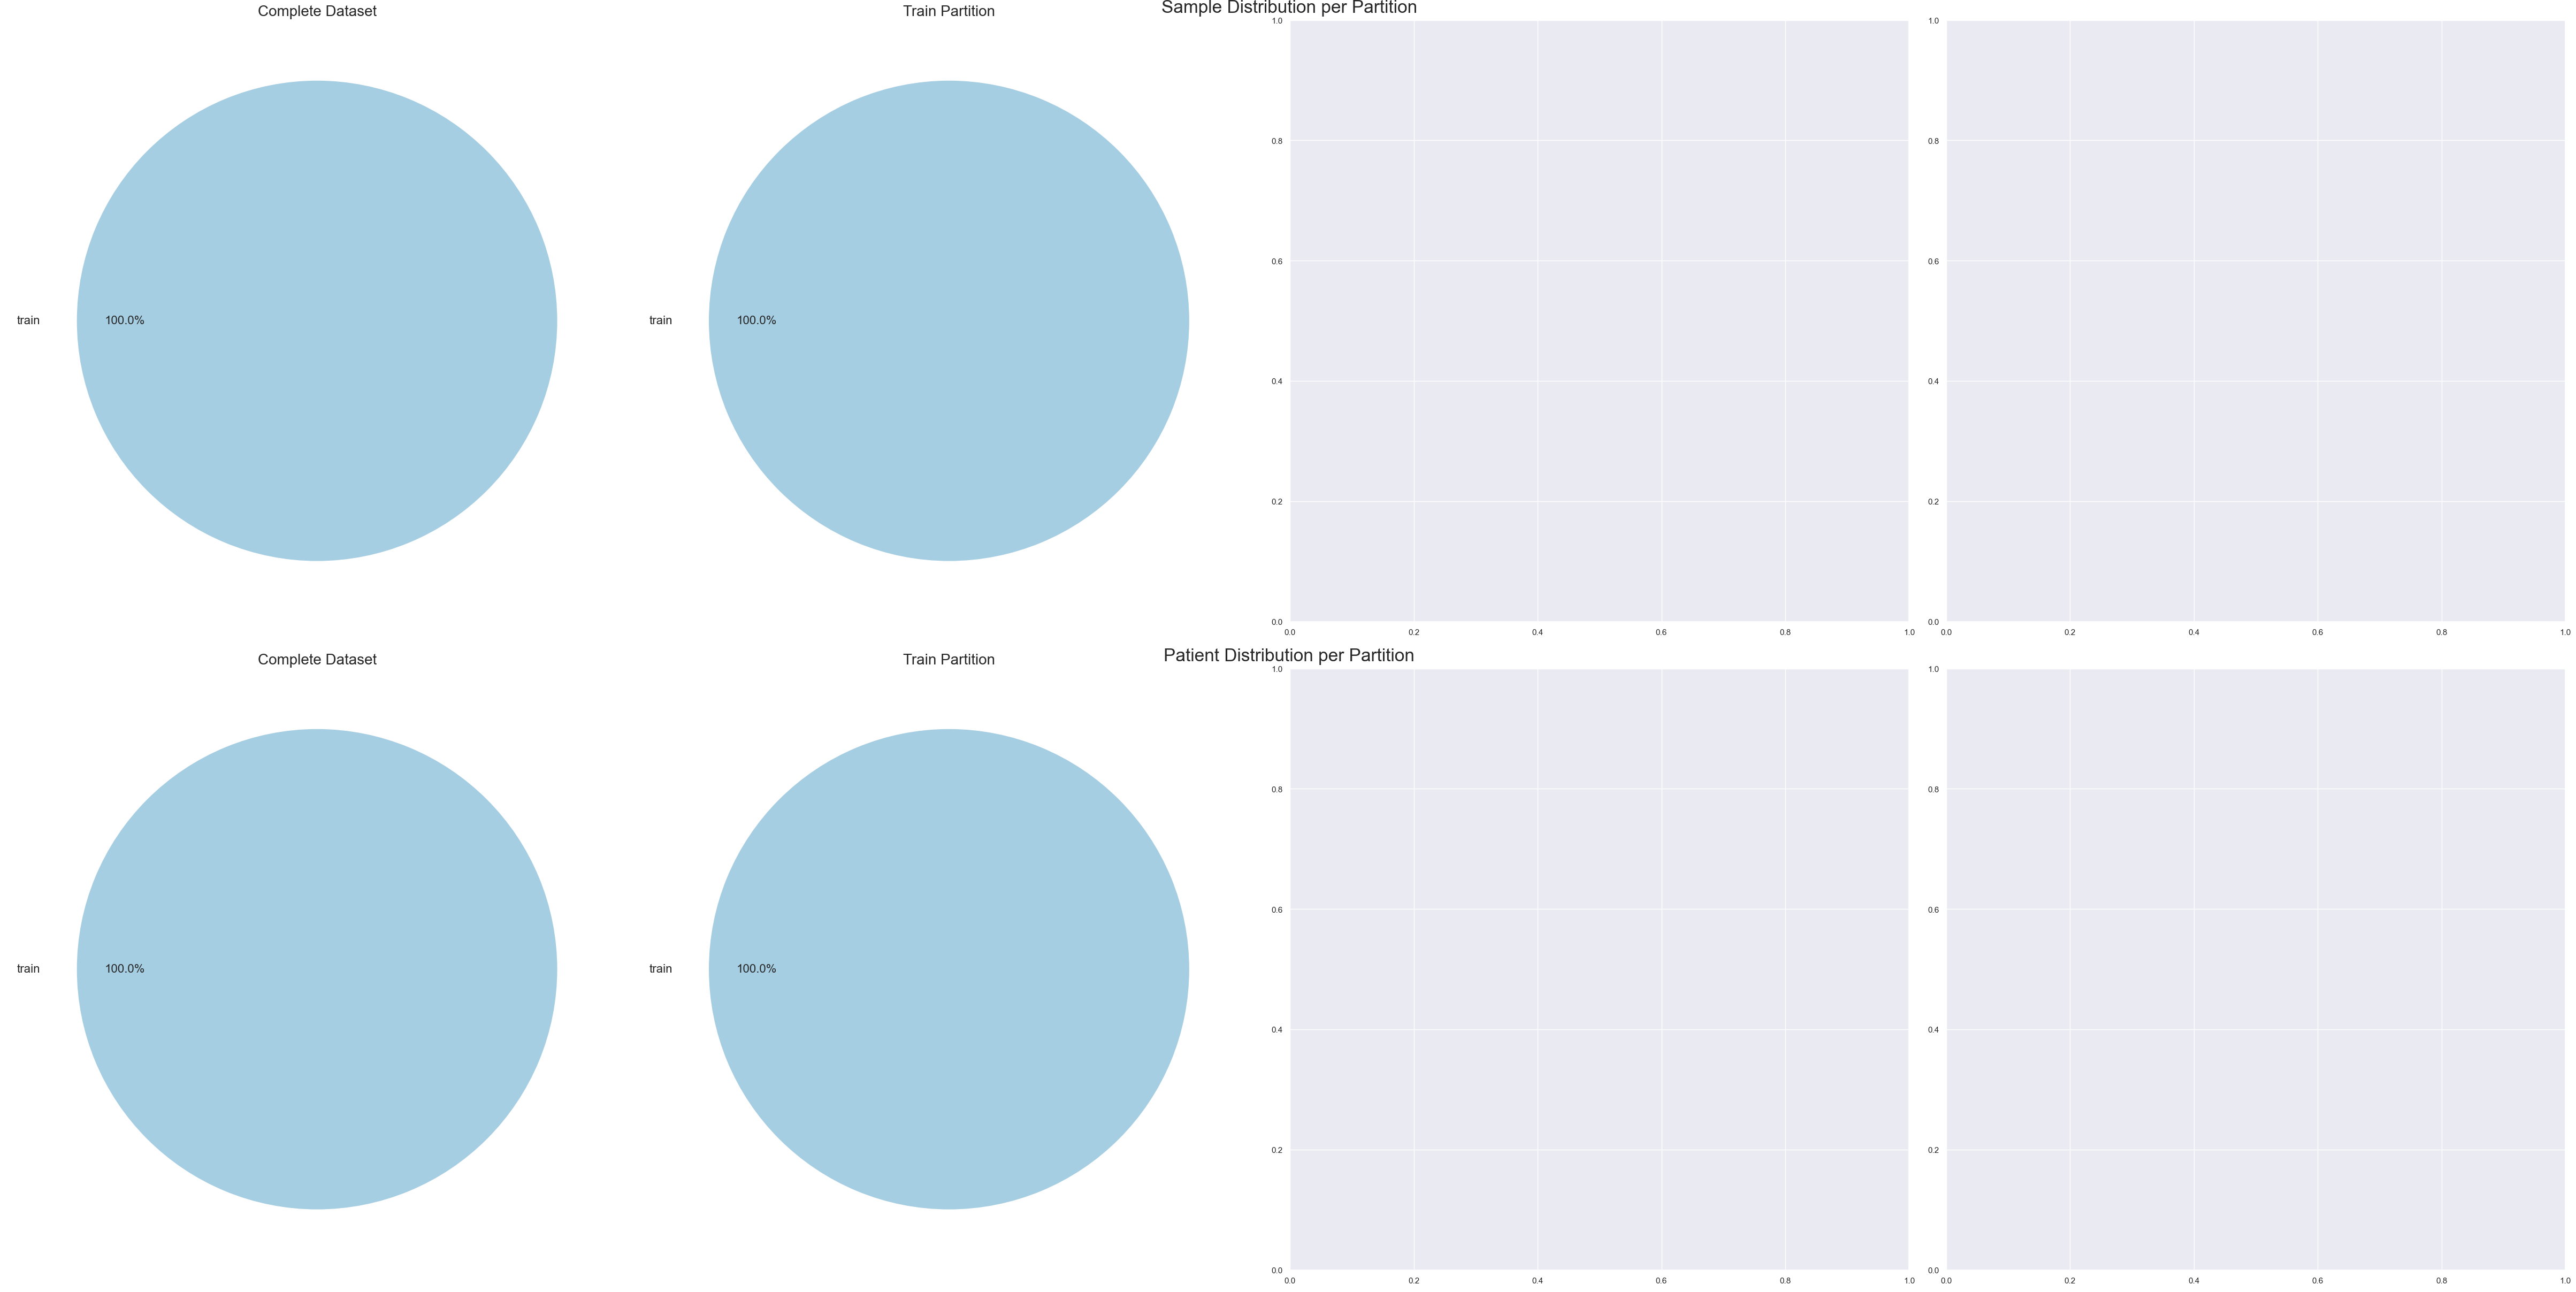

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 14461 
 14461 
 0 
 0 
 
 
 test 
 0 
 0 
 0 
 0 
 
 
 val 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 90 
 90 
 0 
 0 
 
 
 val 
 0 
 0 
 0 
 0 
 
 
 test 
 0 
 0 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

## Slice Selection

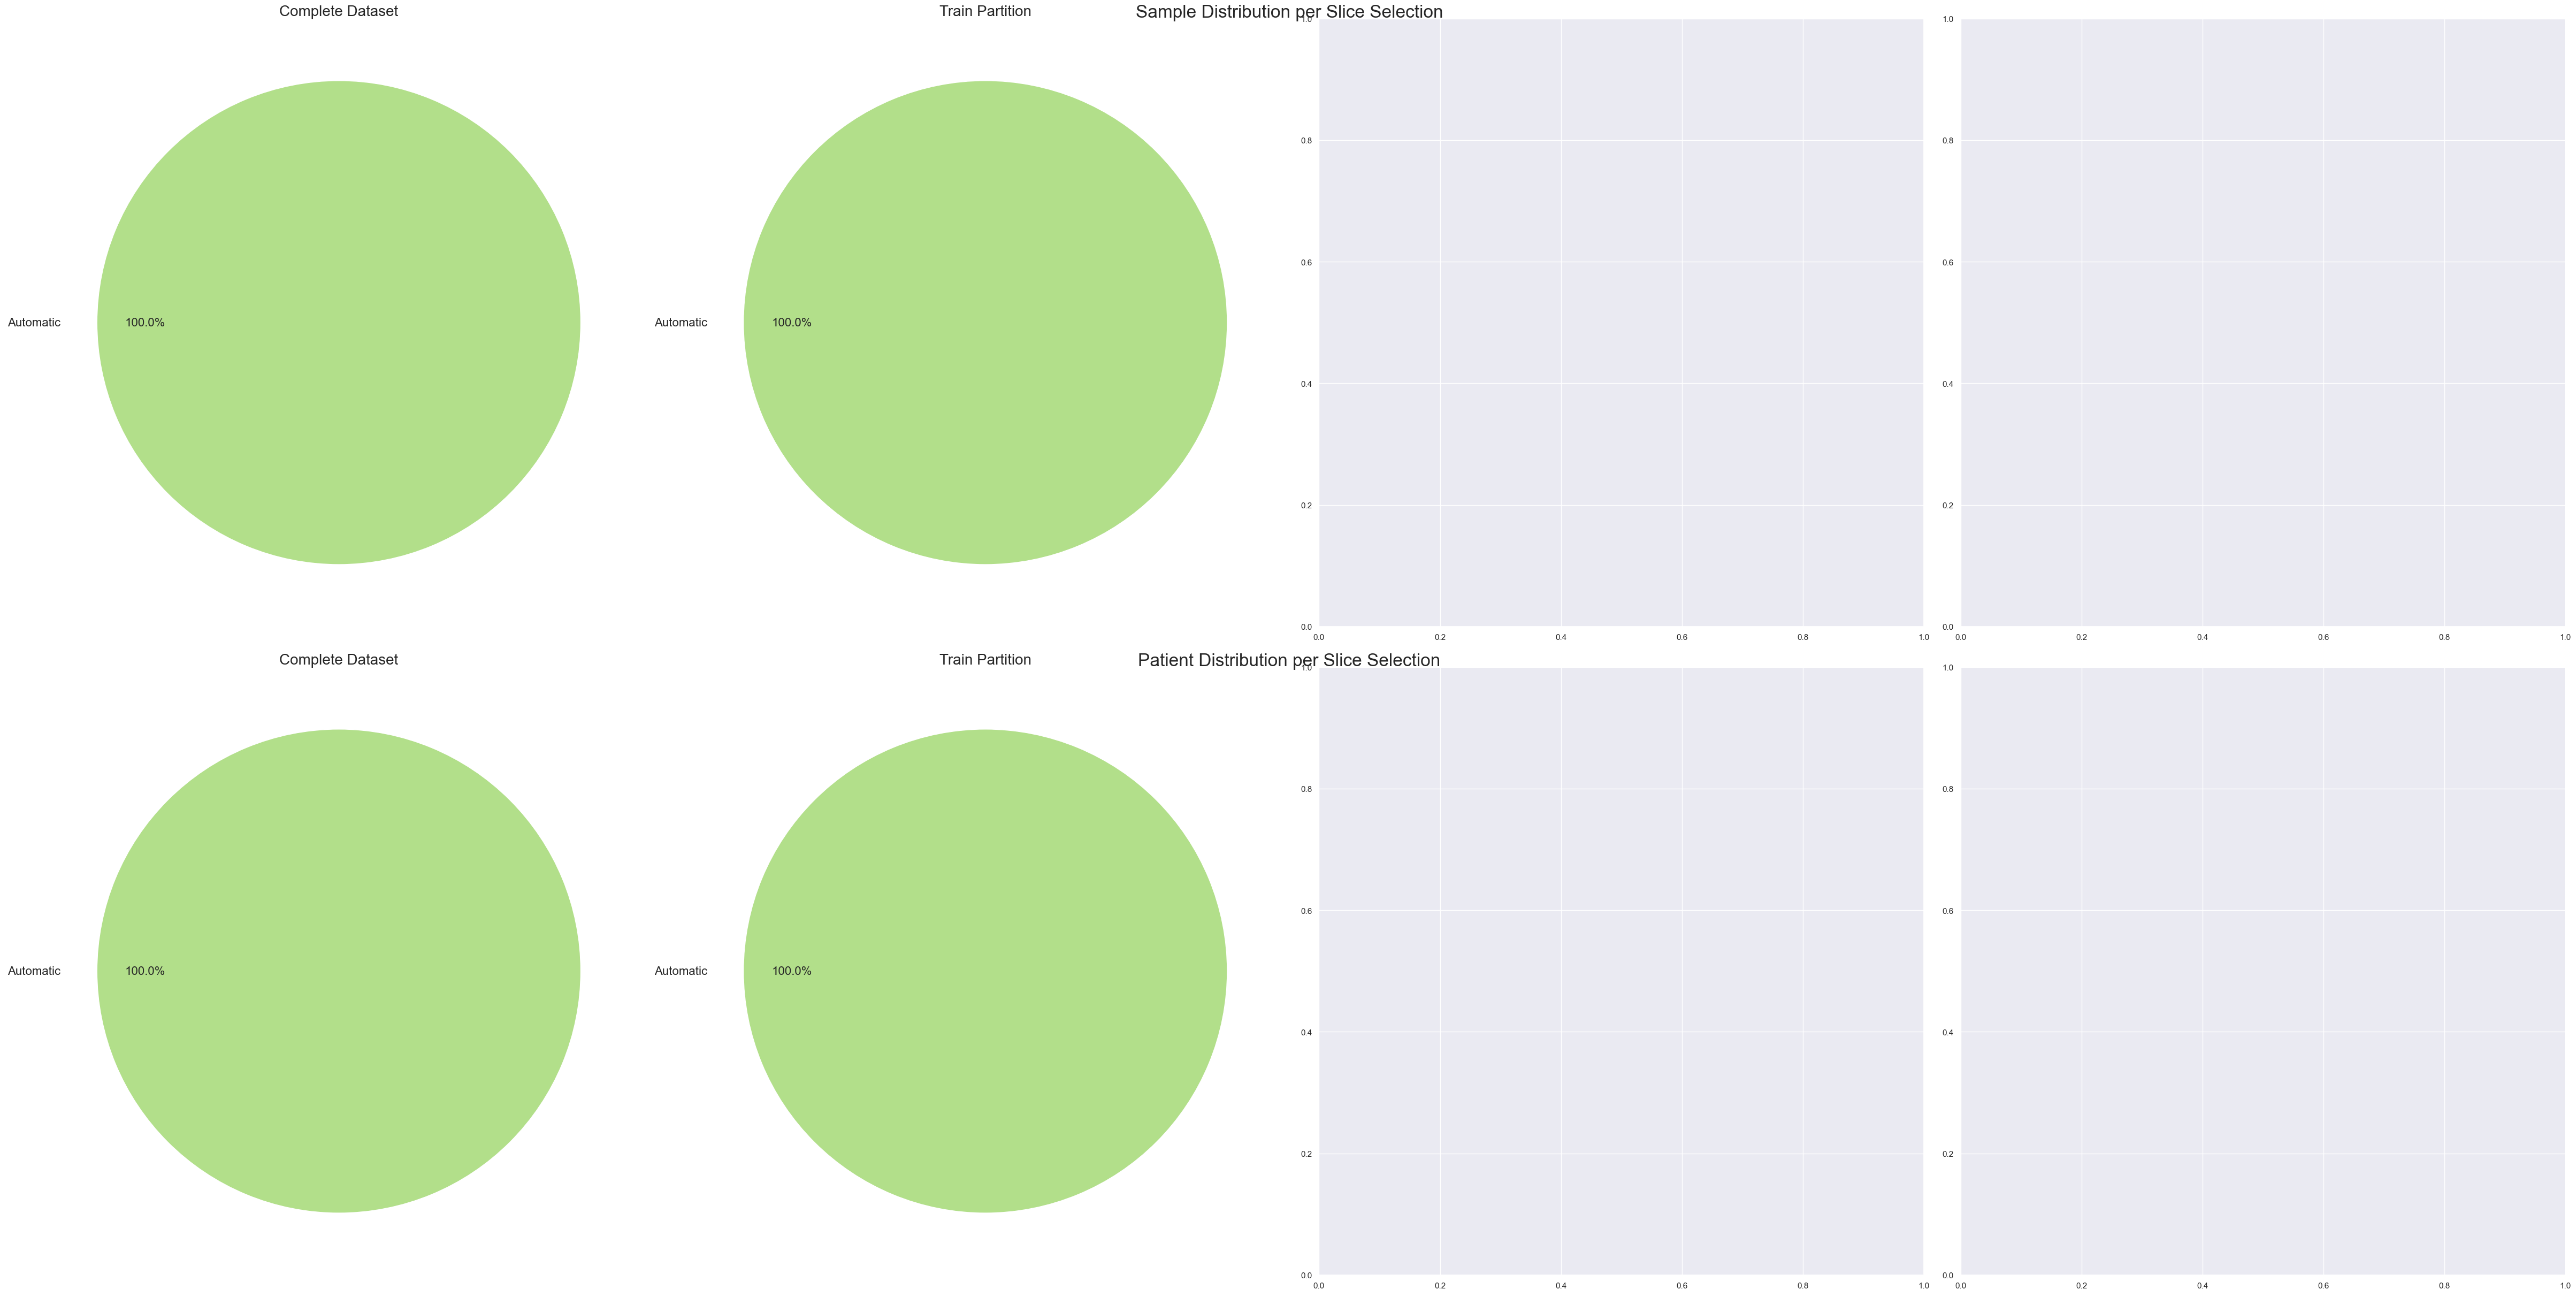

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 14461 
 14461 
 0 
 0 
 
 
 Expert 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 Patient Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 90 
 90 
 0 
 0 
 
 
 Expert 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 90 
 90 
 0 
 0

# Data Split

In [21]:
new_samples_df, new_patient_df = split.radiopaedia_dataset_by_samples( samples_df, patient_df, dataset_name, sample_frac = 0.2, seed = 20 )

    1/1: Group ('N/A', 'COVID-19', 'Automatic', 'N/A', 'N/A')
	[Test] Moved 2890 samples (19 patients), expected 2892 samples, had 14461 samples (90 patients)...
		List of sample counts: [227, 142, 234, 230, 65, 150, 41, 71, 194, 291, 210, 92, 205, 356, 141, 282, 37, 293, 107, 218, 218, 448, 19, 292, 78, 42, 20, 115, 22, 206, 45, 150, 39, 194, 194, 102, 797, 120, 151, 109, 106, 19, 397, 311, 91, 193, 341, 202, 215, 14, 163, 167, 185, 70, 138, 70, 426, 14, 214, 42, 57, 62, 20, 109, 99, 135, 51, 97, 164, 252, 200, 104, 52, 69, 18, 13, 170, 28, 54, 269, 104, 53, 354, 21, 168, 28, 916, 134, 146, 189]
	[Val] Moved 2880 samples (17 patients), expected 2892 samples, had 11571 samples (71 patients)...
		List of sample counts: [282, 293, 218, 218, 448, 292, 42, 20, 115, 22, 206, 45, 150, 39, 194, 194, 102, 797, 120, 151, 109, 106, 19, 397, 311, 91, 193, 341, 202, 215, 14, 163, 167, 185, 70, 138, 70, 426, 14, 214, 42, 57, 62, 20, 109, 99, 135, 51, 97, 164, 252, 200, 104, 52, 69, 18, 13, 170, 28,

# Post Split Plots

## Class

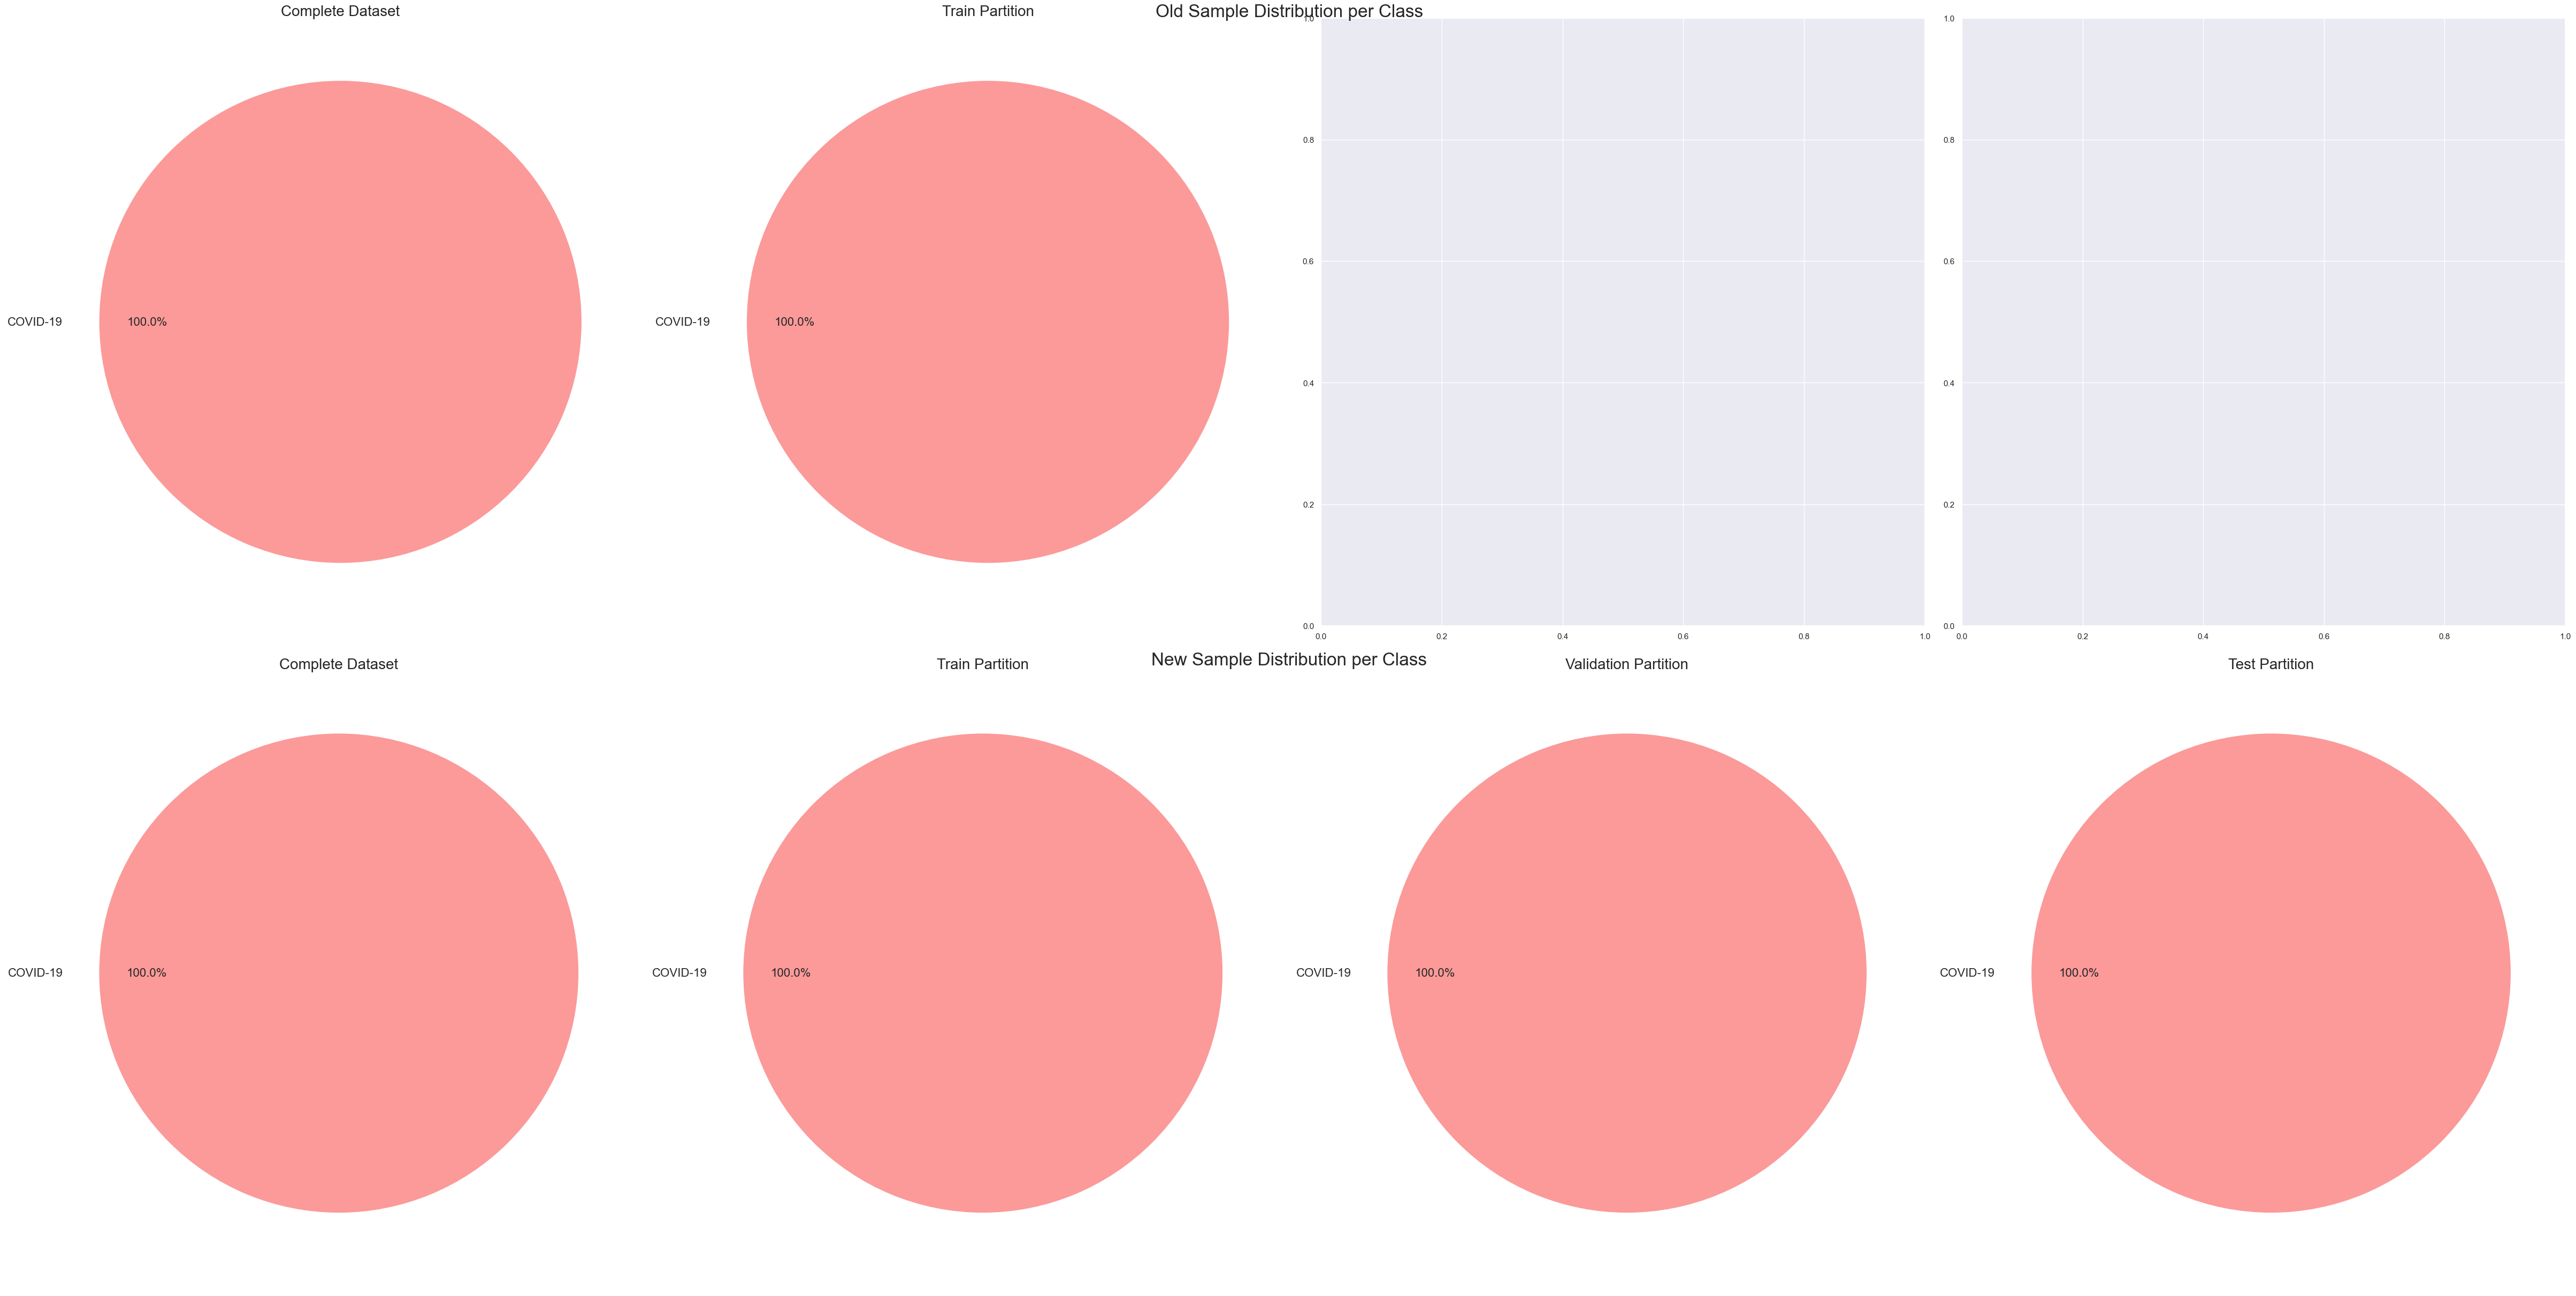

In [22]:
plot.column_as_pies( samples_df, new_samples_df, "class", dataset_name, figsize = (48, 24), resplit = True )

In [23]:
plot.column_as_table( samples_df, new_samples_df, "class", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 14461 
 14461 
 0 
 0 
 
 
 Normal 
 0 
 0 
 0 
 0 
 
 
 Pneumonia 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 14461 
 8691 
 2880 
 2890 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

## Age

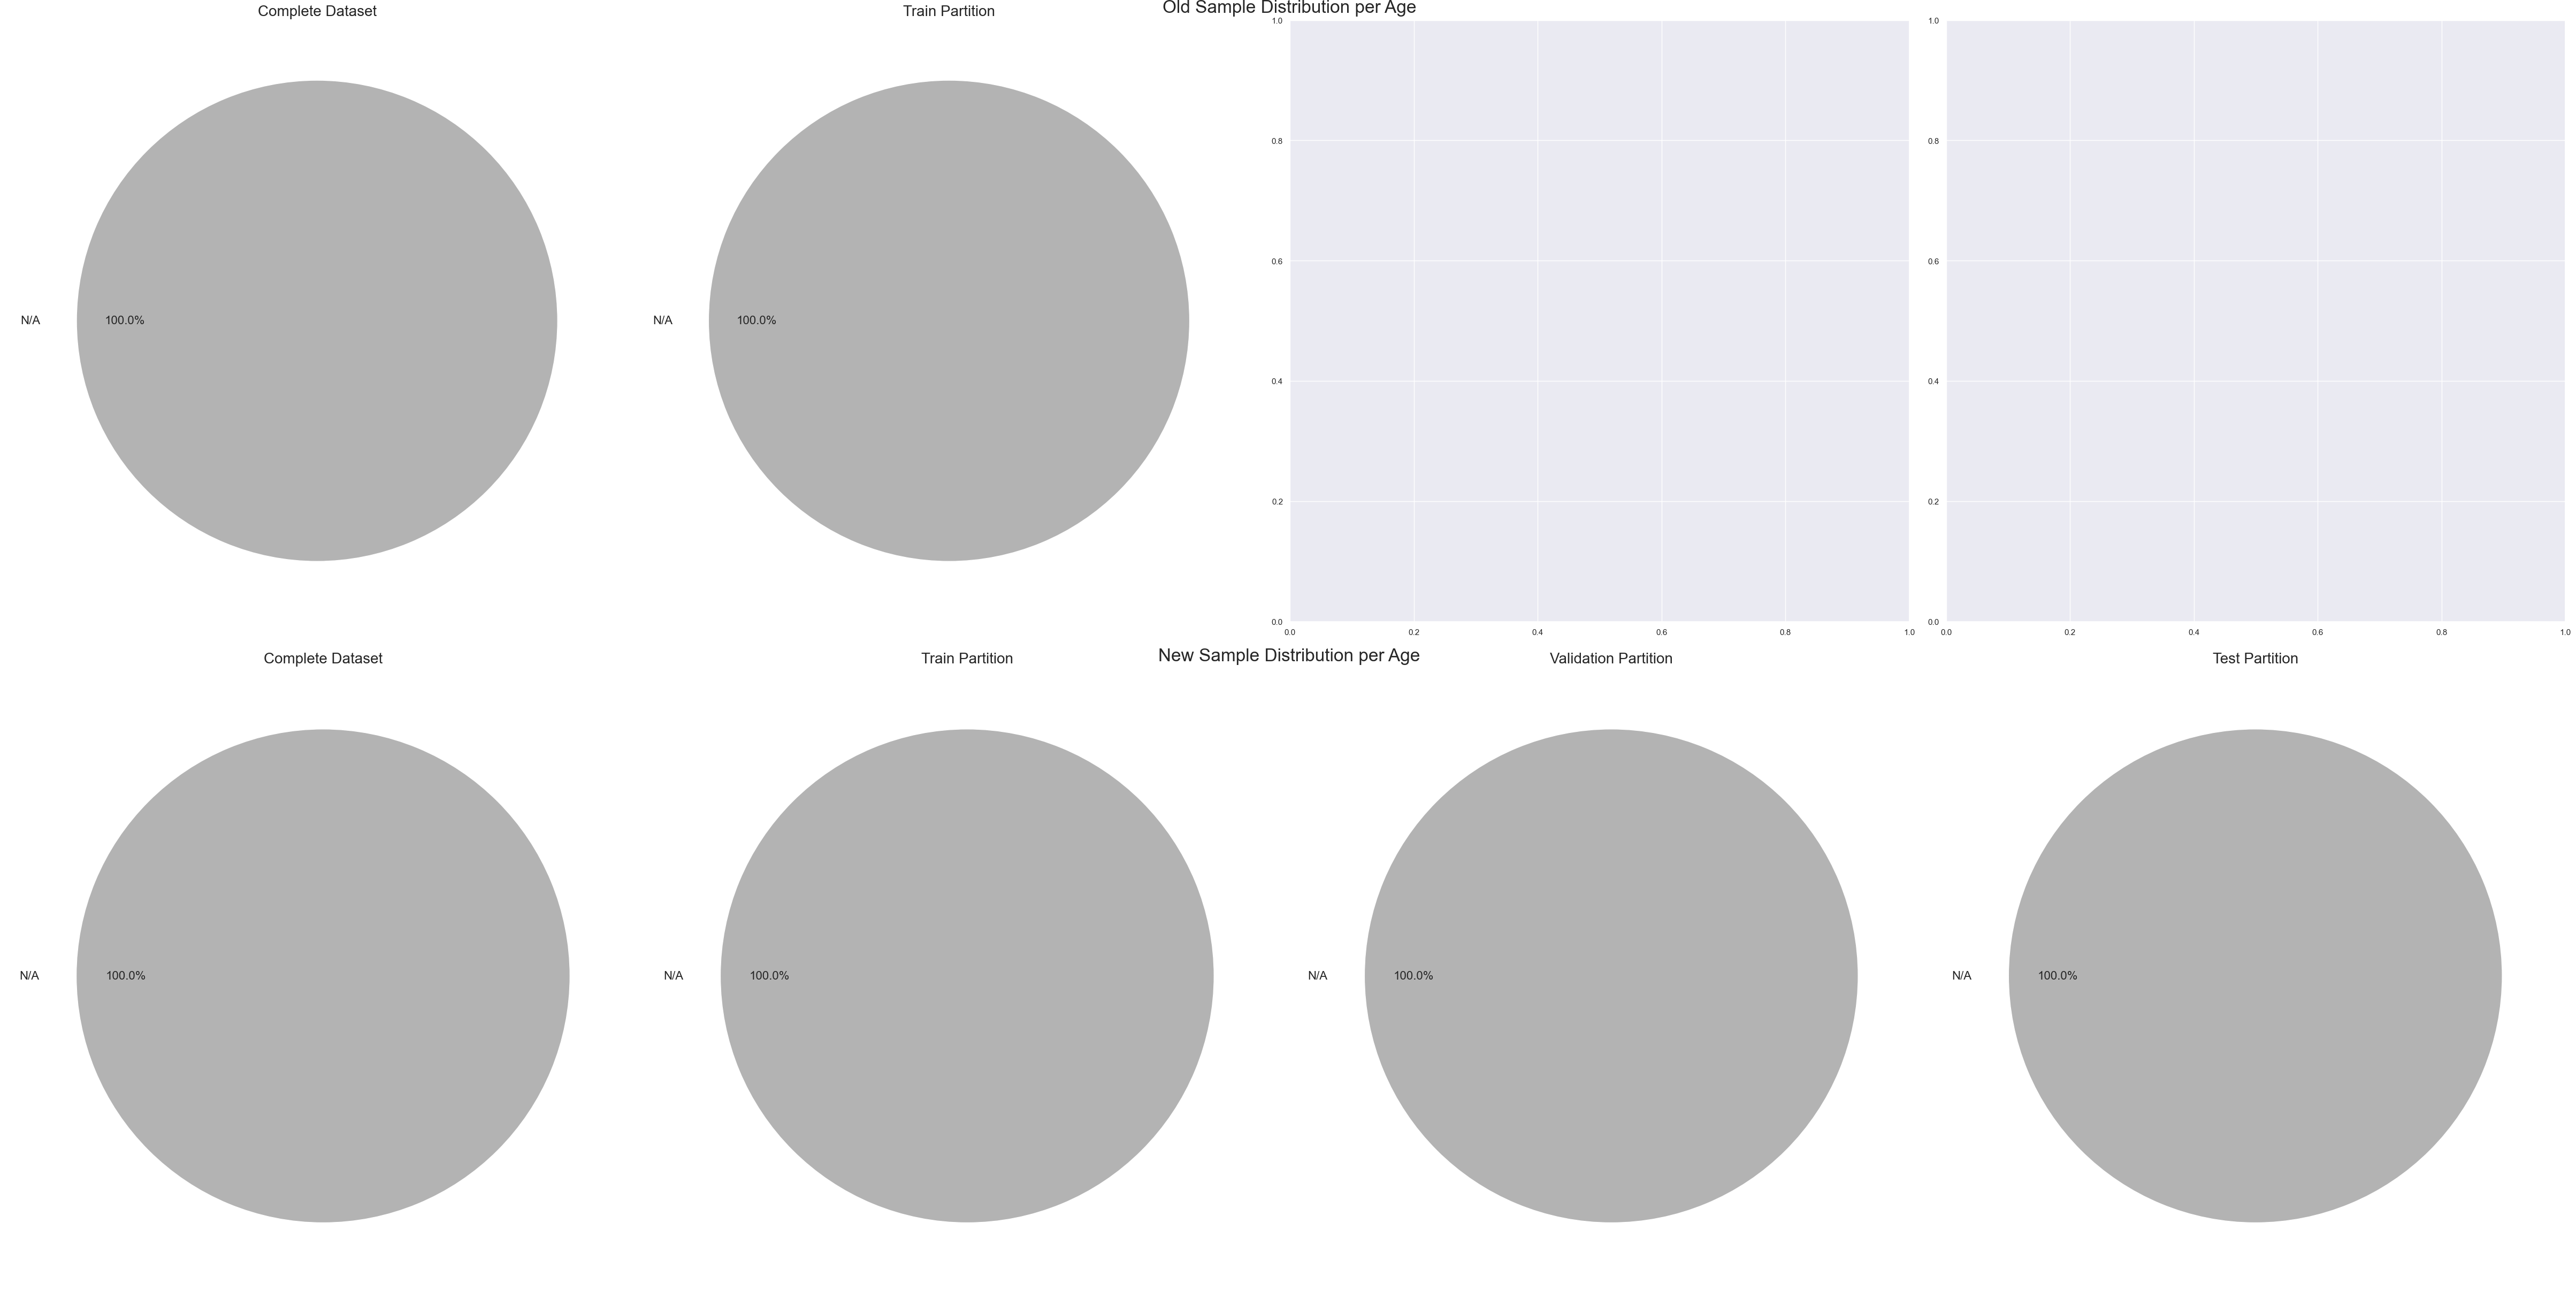

In [24]:
plot.column_as_pies( samples_df, new_samples_df, "age", dataset_name, figsize = (48, 24), resplit = True)

In [25]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 14461 
 14461 
 0 
 0 
 
 
 Known Ages 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 14461 
 8691 
 2880 
 2890 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

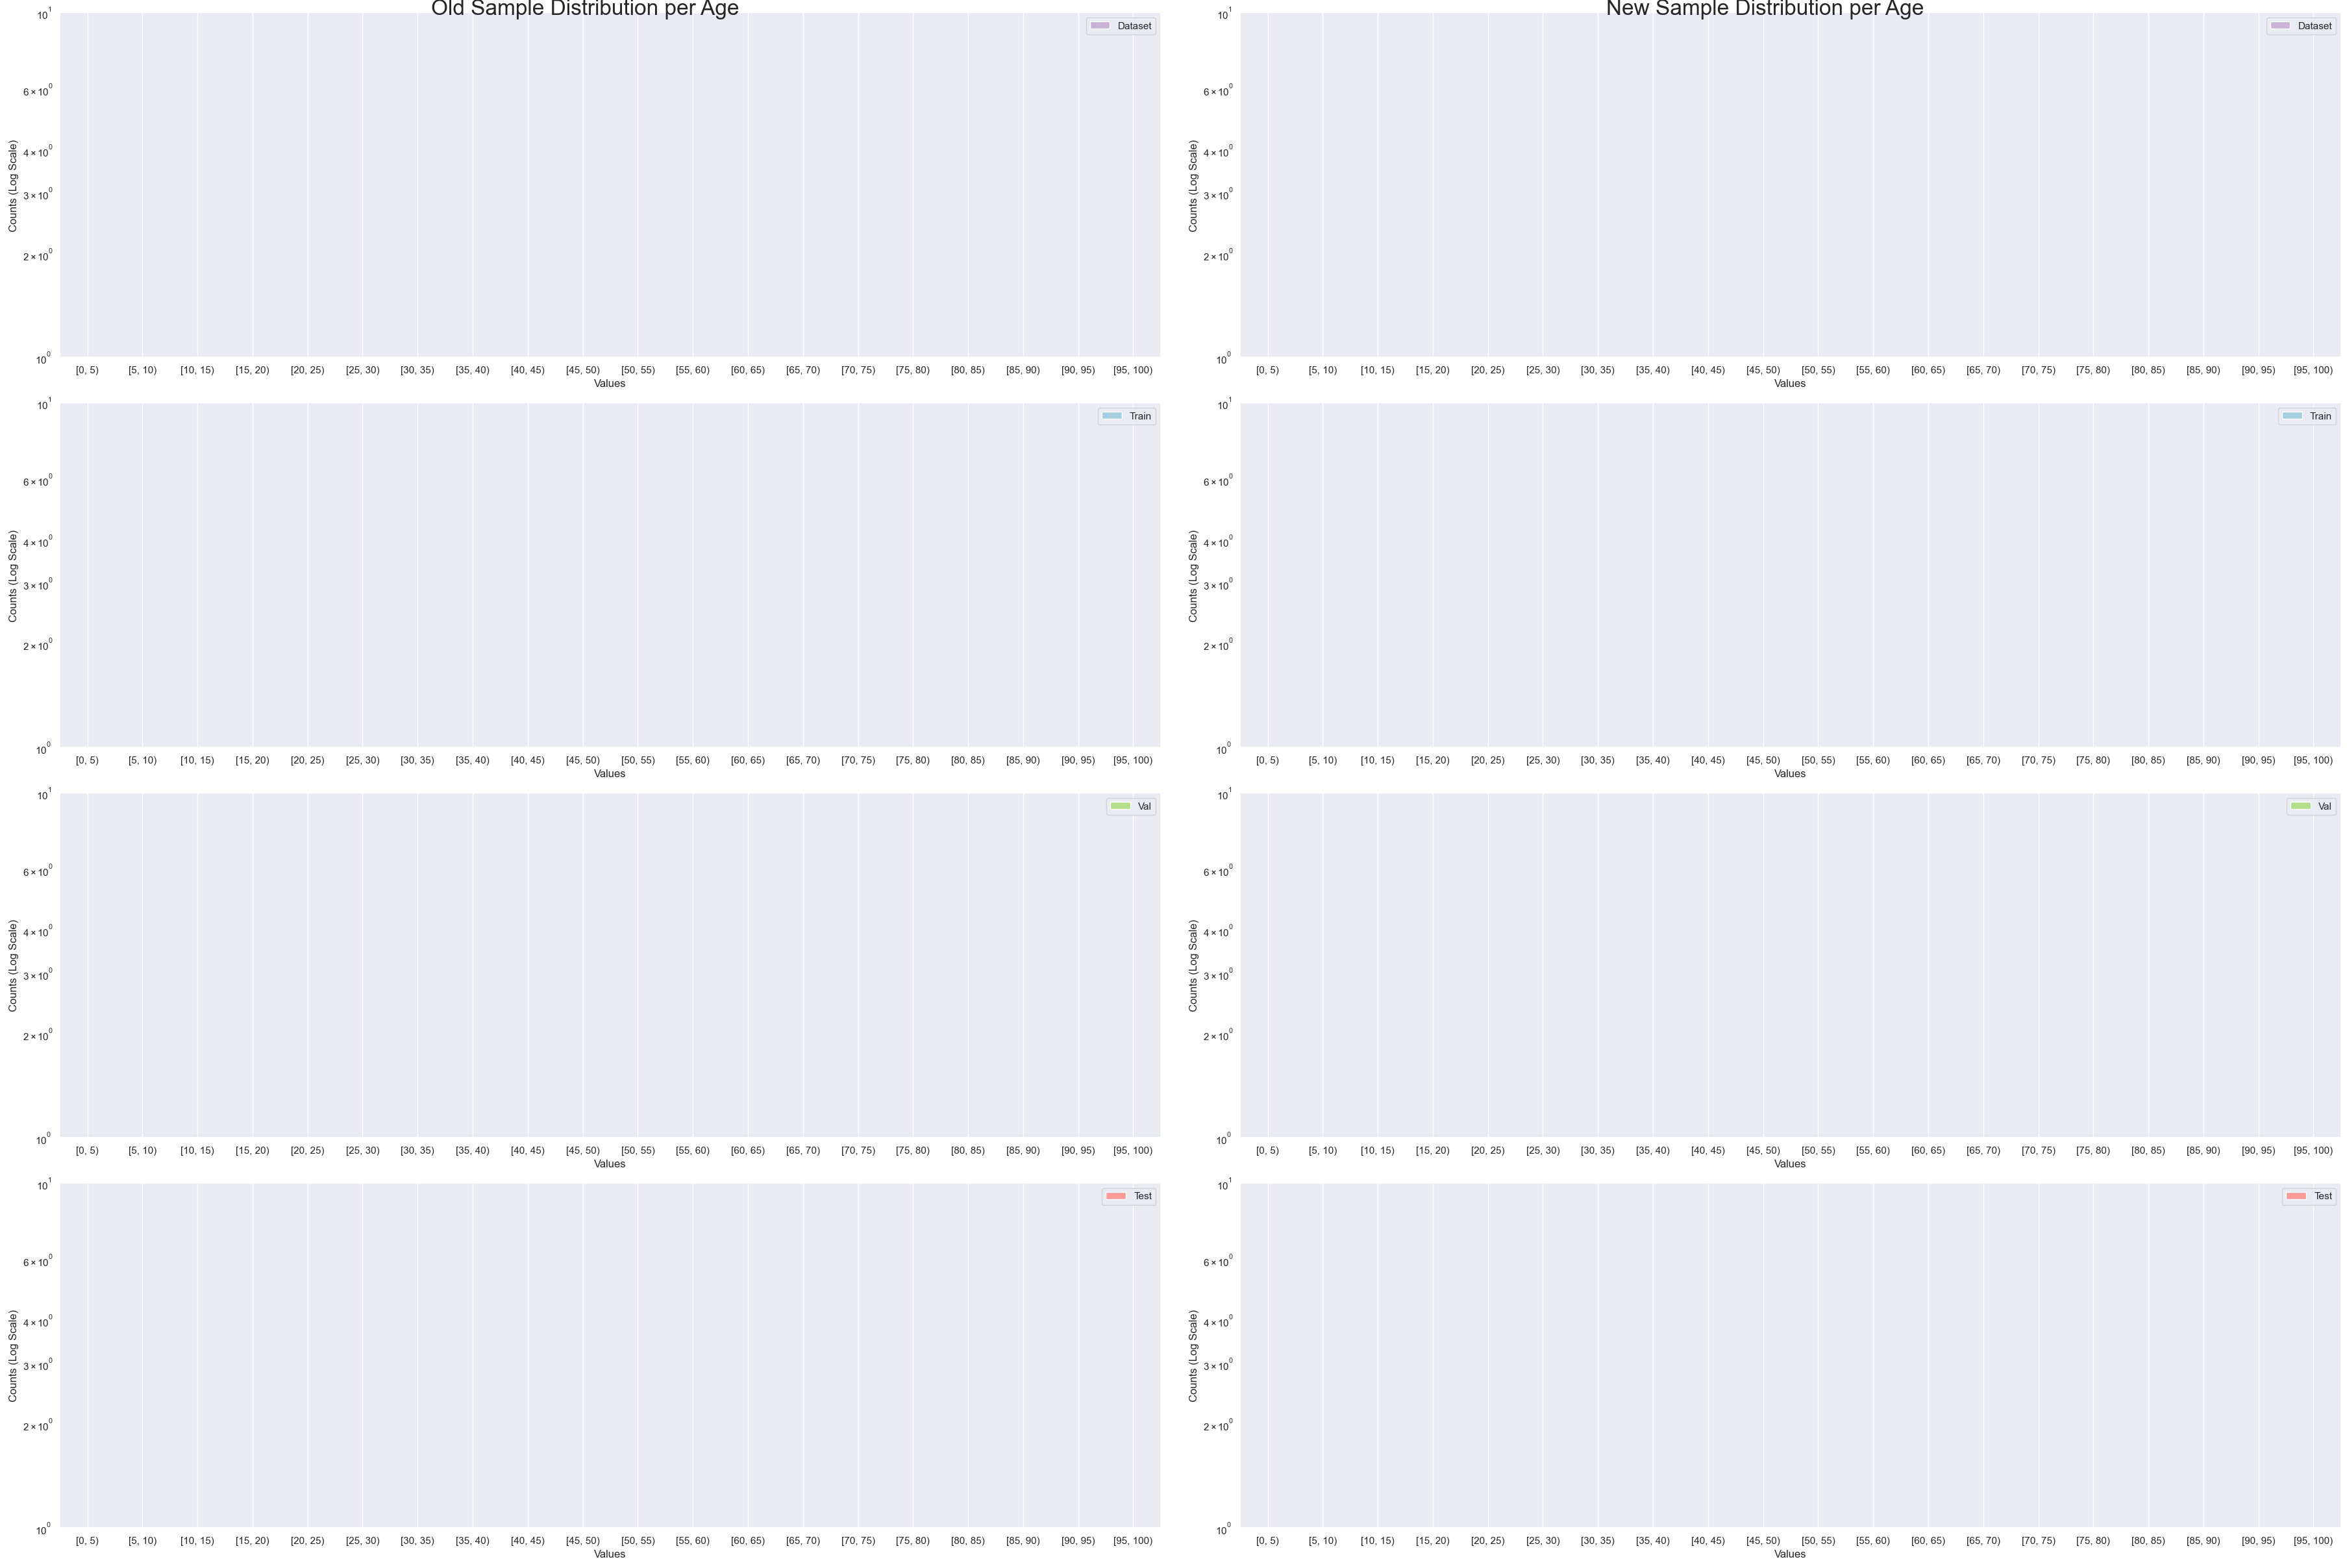

In [26]:
plot.column_as_histograms( samples_df, new_samples_df, "age", dataset_name, figsize = (36, 24), resplit = True)

In [27]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = True, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 0 
 0 
 0 
 0 
 
 
 [20, 25) 
 0 
 0 
 0 
 0 
 
 
 [25, 30) 
 0 
 0 
 0 
 0 
 
 
 [30, 35) 
 0 
 0 
 0 
 0 
 
 
 [35, 40) 
 0 
 0 
 0 
 0 
 
 
 [40, 45) 
 0 
 0 
 0 
 0 
 
 
 [45, 50) 
 0 
 0 
 0 
 0 
 
 
 [50, 55) 
 0 
 0 
 0 
 0 
 
 
 [55, 60) 
 0 
 0 
 0 
 0 
 
 
 [60, 65) 
 0 
 0 
 0 
 0 
 
 
 [65, 70) 
 0 
 0 
 0 
 0 
 
 
 [70, 75) 
 0 
 0 
 0 
 0 
 
 
 [75, 80) 
 0 
 0 
 0 
 0 
 
 
 [80, 85) 
 0 
 0 
 0 
 0 
 
 
 [85, 90) 
 0 
 0 
 0 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 0 
 0 
 0 
 0 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 0 
 0 
 0 
 0 
 
 
 [20, 25) 
 0 
 0 
 0 
 0 
 
 
 [25, 30) 
 0 
 0 
 0 
 0 
 
 
 [30, 35) 
 0 
 0 
 0 
 0 
 
 
 [35, 40) 
 0 
 0 
 0 
 0 
 
 
 [40, 45) 
 0 
 0 
 0 
 0 
 
 
 [45, 50) 
 0 
 0 
 0 
 0 
 
 
 [50, 55) 
 0 
 0 
 0 
 0 
 
 
 [55, 60) 
 0 
 0 
 0 
 0 
 
 
 [60, 65) 
 0 
 0 
 0 
 0 
 
 
 [65, 70) 
 0 
 0 
 0 
 0 
 
 
 [70, 75) 
 0 
 0 
 0 
 0 
 
 
 [75, 80) 
 0 
 0 
 0 
 0 
 
 
 [80, 85) 
 0 
 0 
 0 
 0 
 
 
 [85, 90) 
 0 
 0 
 0 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 0 
 0 
 0 
 0

## Sex

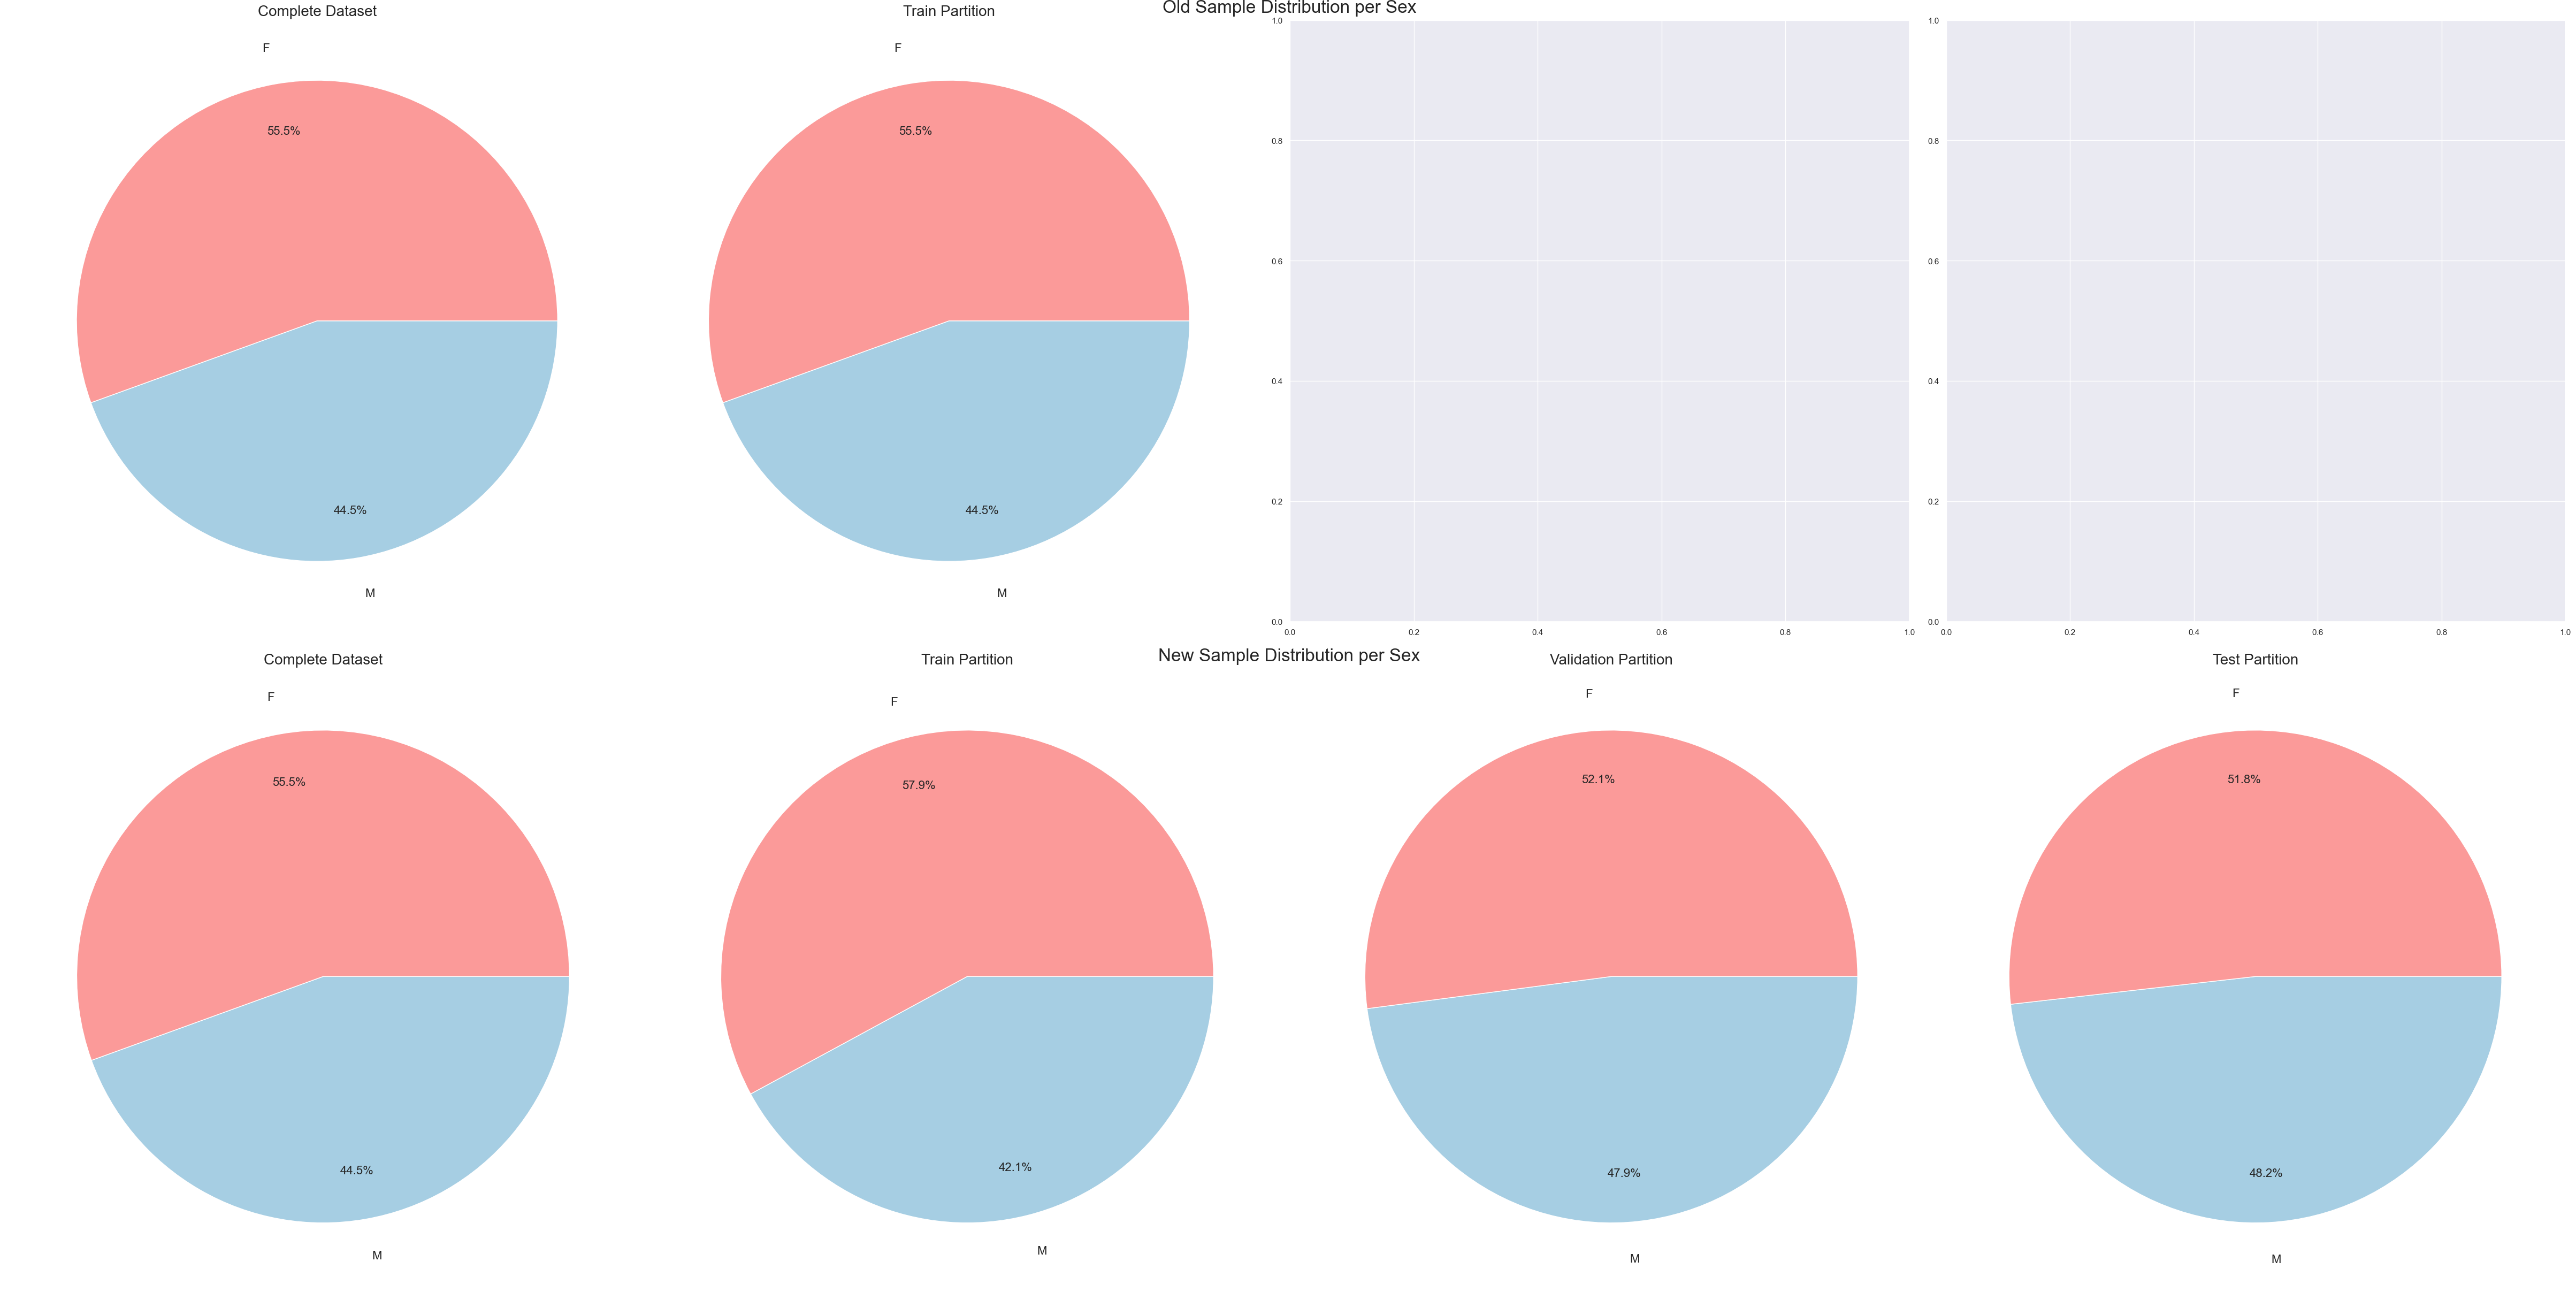

In [28]:
plot.column_as_pies( samples_df, new_samples_df, "sex", dataset_name, figsize = (48, 24), resplit = True )

In [29]:
plot.column_as_table( samples_df, new_samples_df, "sex", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 6431 
 6431 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 F 
 8030 
 8030 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 F 
 8030 
 5033 
 1500 
 1497 
 
 
 M 
 6431 
 3658 
 1380 
 1393 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

## Country

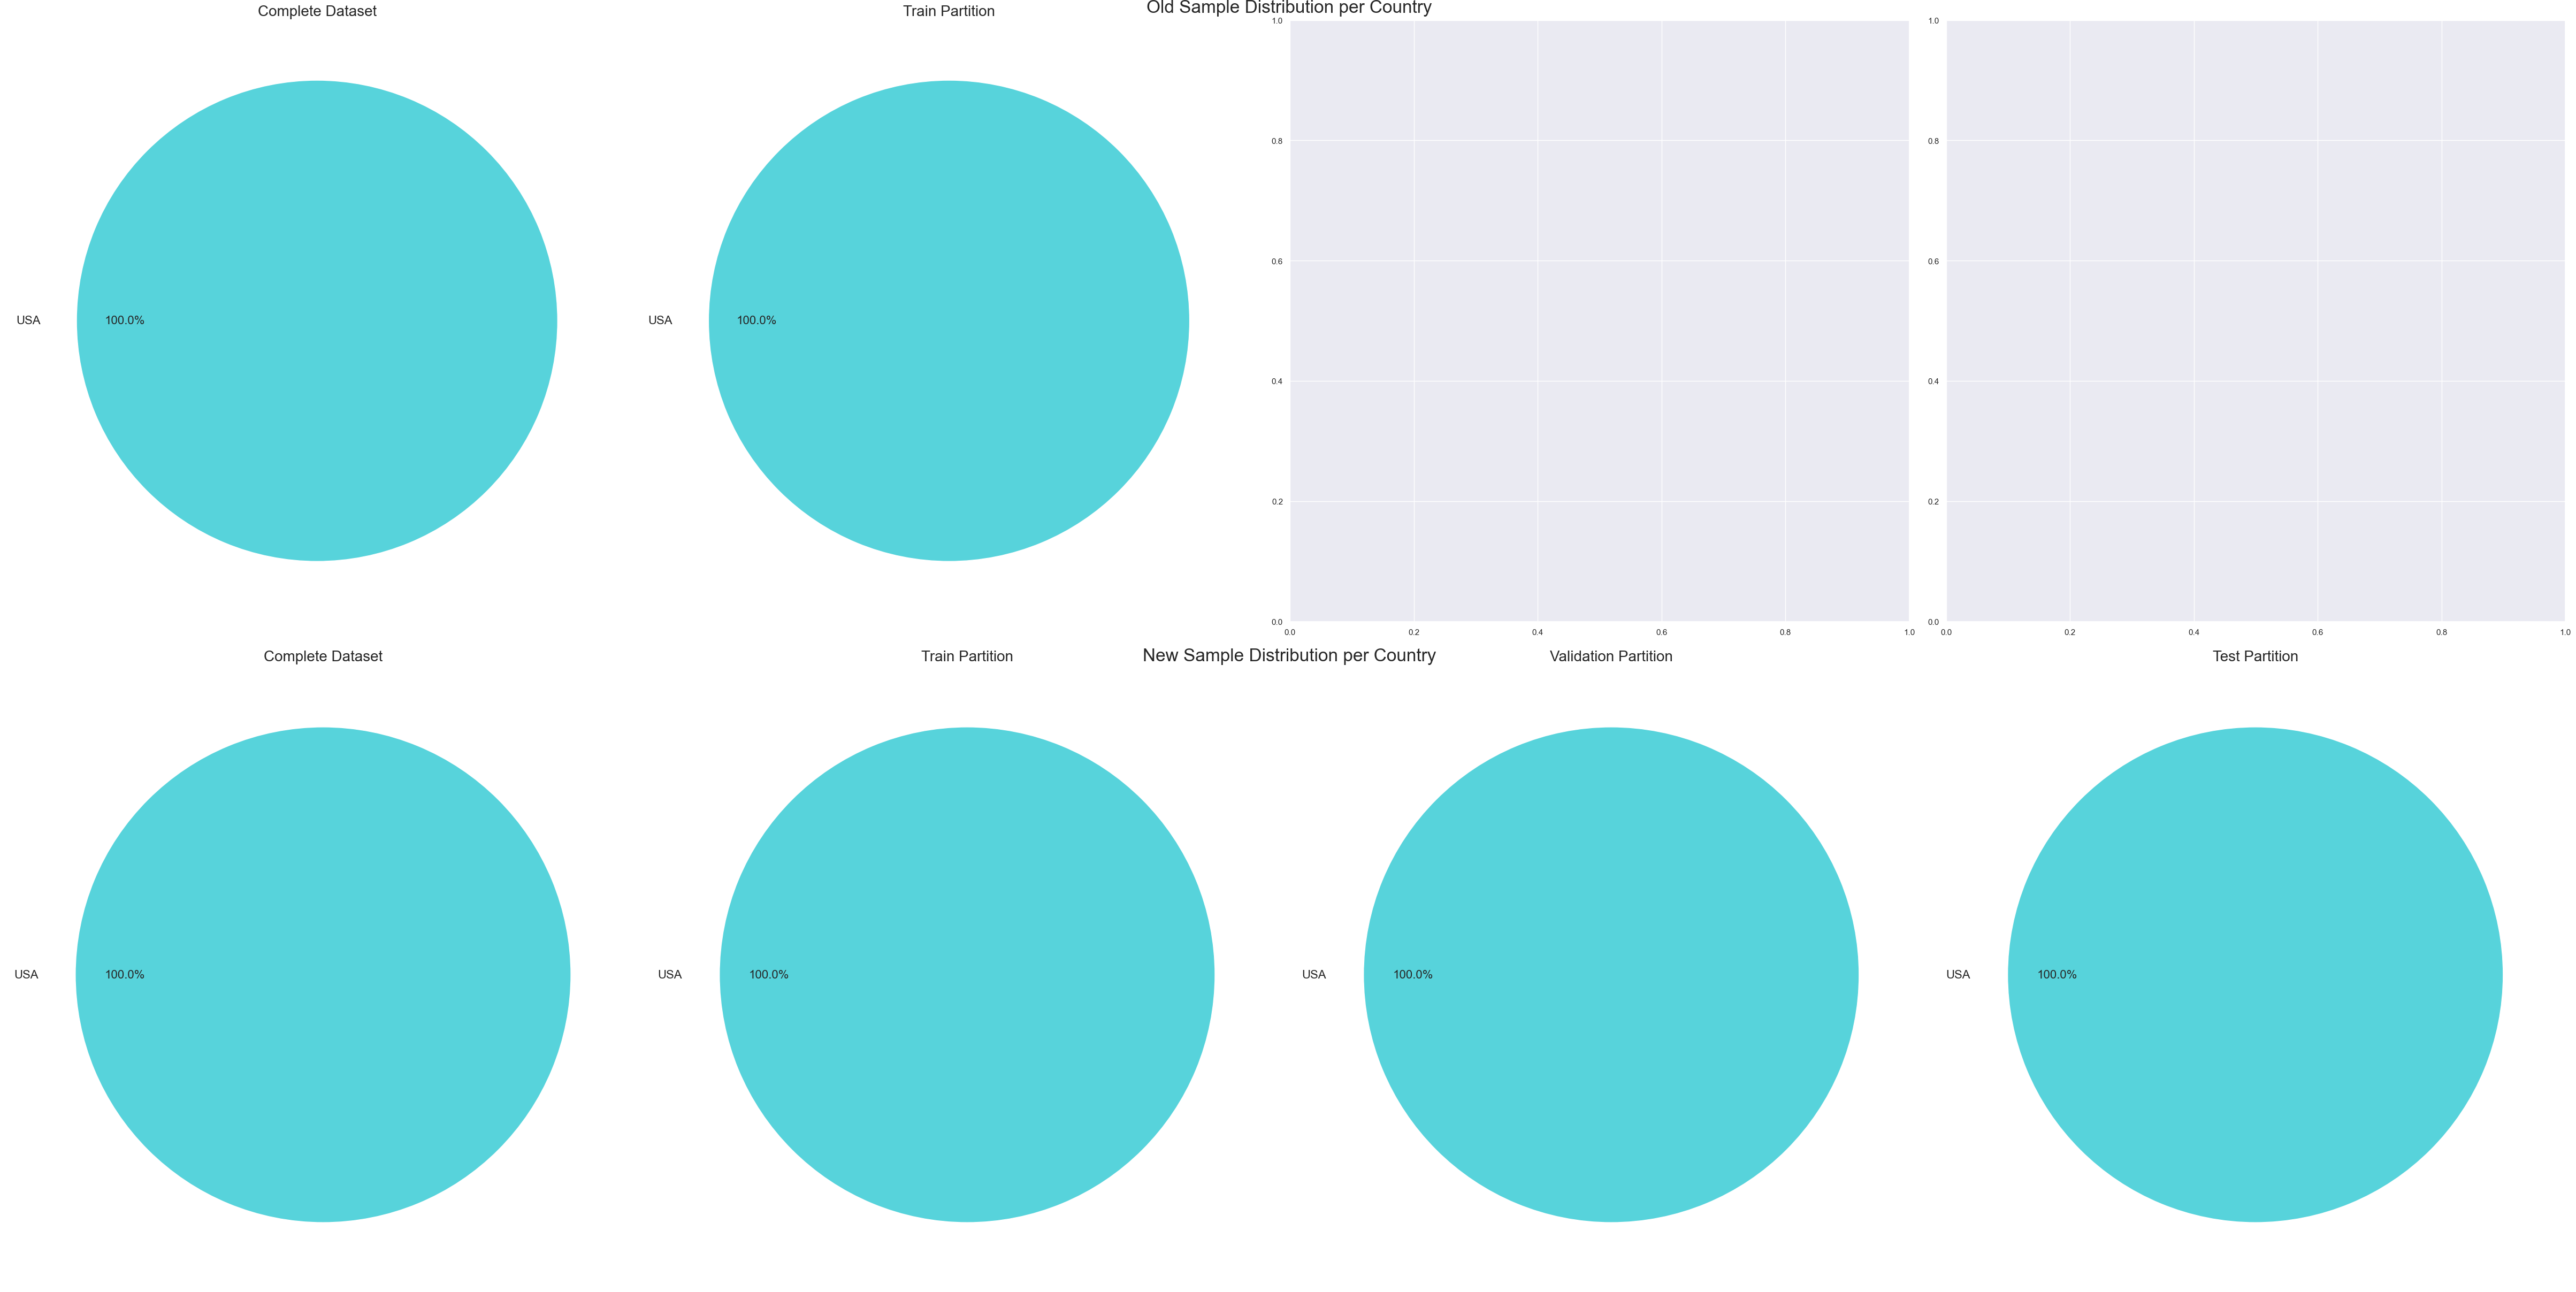

In [30]:
plot.column_as_pies( samples_df, new_samples_df, "country", dataset_name, figsize = (48, 24), resplit = True )

In [31]:
plot.column_as_table( samples_df, new_samples_df, "country", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 USA 
 14461 
 14461 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 USA 
 14461 
 8691 
 2880 
 2890 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

## Partition

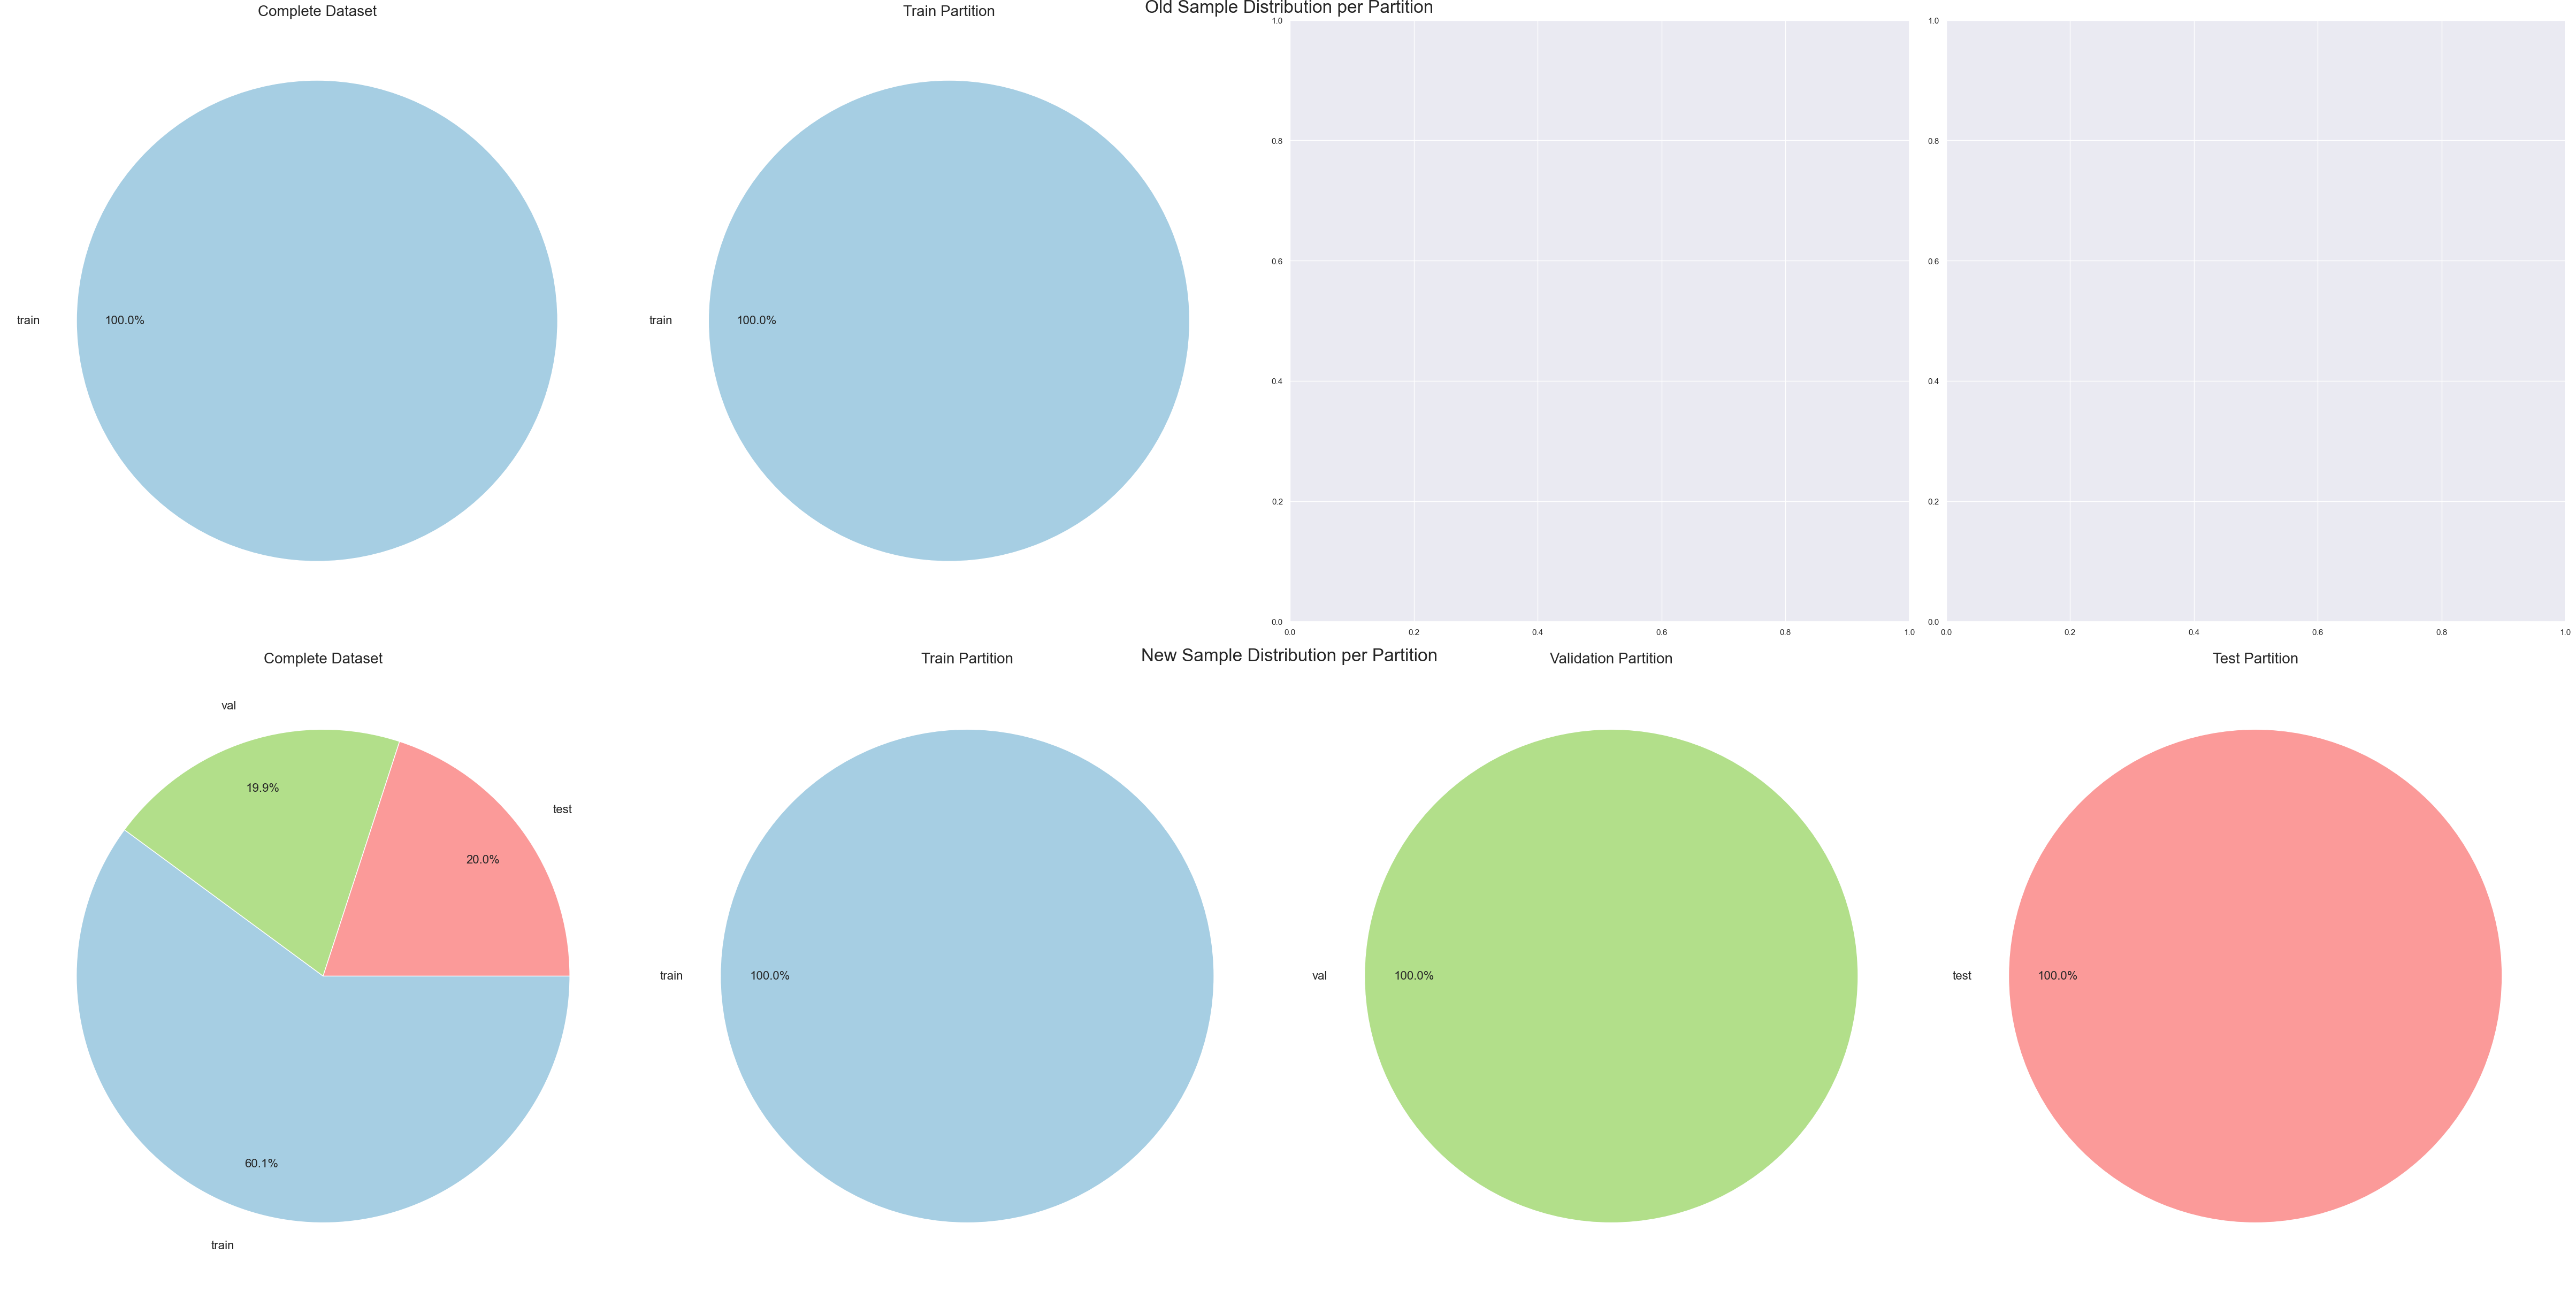

In [32]:
plot.column_as_pies( samples_df, new_samples_df, "partition", dataset_name, figsize = (48, 24), resplit = True )

In [33]:
plot.column_as_table( samples_df, new_samples_df, "partition", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 14461 
 14461 
 0 
 0 
 
 
 test 
 0 
 0 
 0 
 0 
 
 
 val 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 8691 
 8691 
 0 
 0 
 
 
 test 
 2890 
 0 
 0 
 2890 
 
 
 val 
 2880 
 0 
 2880 
 0 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

## Slice Selection

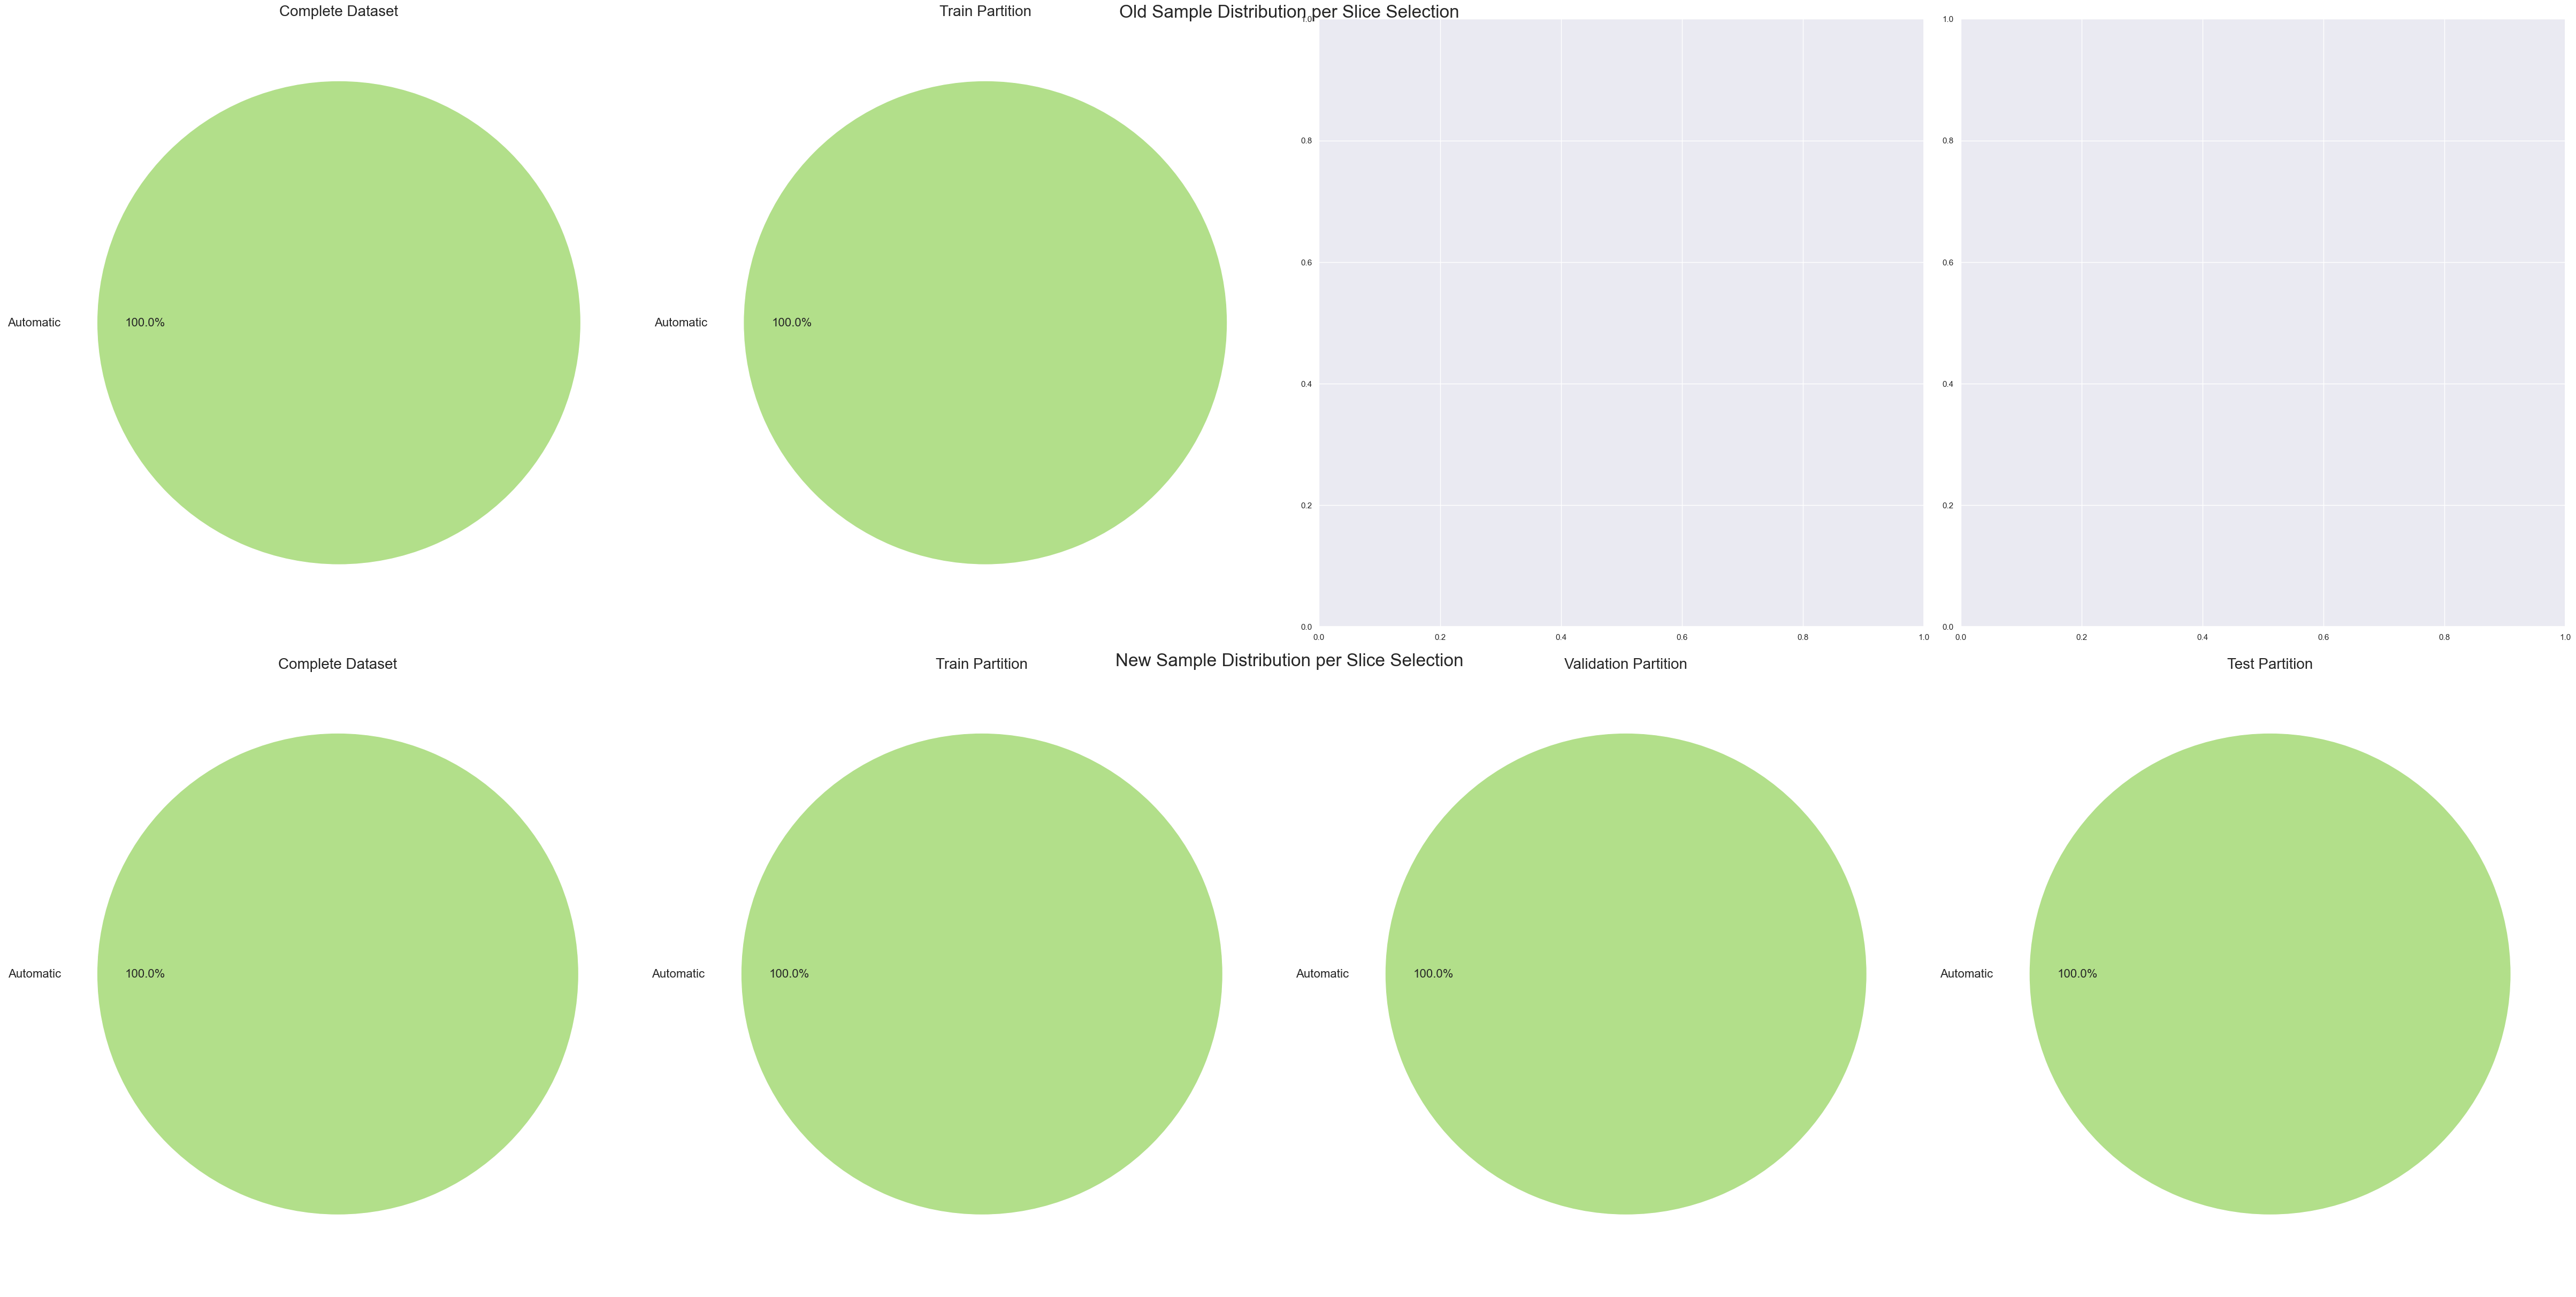

In [34]:
plot.column_as_pies( samples_df, new_samples_df, "slice_selection", dataset_name, figsize = (48, 24), resplit = True )

In [35]:
plot.column_as_table( samples_df, new_samples_df, "slice_selection", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 14461 
 14461 
 0 
 0 
 
 
 Expert 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 14461 
 14461 
 0 
 0 
 
 
 New Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 14461 
 8691 
 2880 
 2890 
 
 
 SUM 
 14461 
 8691 
 2880 
 2890

# Registering Changes

In [36]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, new_samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(new_samples_df) )
updated_df.head()

425024 14461


filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT